# CineFeel_Phase_4.Create_Feeling_Graph

# ÌôòÍ≤Ω ÏÑ§Ï†ï Î∞è Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

In [ ]:
# prompt: ÌòÑÏû¨ Îü∞ÌÉÄÏûÑÏùò ÏÇ¨ÏñëÍ≥º, GPU ÌôïÏù∏

!nvidia-smi

Thu Aug  7 01:18:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.133.20             Driver Version: 570.133.20     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   45C    P8             12W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò

In [ ]:
!pip install fer opencv-python-headless matplotlib moviepy --quiet

  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.5/1.5 MB 24.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.9/1.9 MB 65.6 MB/s eta 0:00:00


## ÏòÅÏÉÅÏ§ÄÎπÑ

In [ ]:
# prompt: sesac-ljj-20250715/pjt_cinefeel/src/source_collector/result/video/0003_youtube_trailer_01.mp4 Î≤ÑÌÇ∑ÏóêÏÑú Ìï¥Îãπ ÏòÅÏÉÅ Îã§Ïö¥Î°úÎìú

video_source = "sesac-ljj-20250715/pjt_cinefeel/src/source_collector/result/video/0003_youtube_trailer_01.mp4"

!gsutil cp gs://{video_source} .

Copying gs://sesac-ljj-20250715/pjt_cinefeel/src/source_collector/result/video/0003_youtube_trailer_01.mp4...
/ [1 files][  4.4 MiB/  4.4 MiB]                                                
Operation completed over 1 objects/4.4 MiB.                                      


In [ ]:
video_path = "/content/0003_youtube_trailer_01.mp4"

In [ ]:
import cv2
import os

frame_dir = "frames"
os.makedirs(frame_dir, exist_ok=True)

cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_rate = 5
frame_interval = int(fps // frame_rate)

frames = []
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    if frame_count % frame_interval == 0:
        frame_path = f"{frame_dir}/frame_{frame_count}.jpg"
        cv2.imwrite(frame_path, frame)
        frames.append(frame_path)
    frame_count += 1

cap.release()


### Î™®Îì† ÌîÑÎ†àÏûÑ Ï∂îÏ∂ú

In [ ]:
import cv2
import os

# Ïù¥Ï†ÑÏóê ÏÉùÏÑ±Îêú ÌîÑÎ†àÏûÑÏù¥ ÏûàÎã§Î©¥ ÏÇ≠Ï†úÌï©ÎãàÎã§.
frame_dir = "frames"
if os.path.exists(frame_dir):
    for f in os.listdir(frame_dir):
        os.remove(os.path.join(frame_dir, f))
else:
    os.makedirs(frame_dir, exist_ok=True)


cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS) # ÏµúÏ¢Ö ÏòÅÏÉÅ Ìï©ÏÑ±Ïóê ÌïÑÏöîÌïòÎØÄÎ°ú fpsÎäî Ï†ÄÏû•Ìï¥ Îë°ÎãàÎã§.

frames = []
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Î™®Îì† ÌîÑÎ†àÏûÑÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
    frame_path = f"{frame_dir}/frame_{frame_count}.jpg"
    cv2.imwrite(frame_path, frame)
    frames.append(frame_path)
    frame_count += 1

cap.release()

print(f"Ï¥ù {frame_count}Í∞úÏùò ÌîÑÎ†àÏûÑÏùÑ Ï∂îÏ∂úÌïòÏó¨ 'frames' ÎîîÎ†âÌÜ†Î¶¨Ïóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.")
print(f"ÏòÅÏÉÅ FPS: {fps}")

Ï¥ù 5167Í∞úÏùò ÌîÑÎ†àÏûÑÏùÑ Ï∂îÏ∂úÌïòÏó¨ 'frames' ÎîîÎ†âÌÜ†Î¶¨Ïóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.
ÏòÅÏÉÅ FPS: 30.0


In [ ]:
# prompt: framesÎ•º zipÏúºÎ°ú ÏïïÏ∂ïÌïòÏó¨, sesac-ljj-20250715/pjt_cinefeel/src/source_collector/result/photo Î≤ÑÌÇ∑Ïóê ÏóÖÎ°úÎìú. ÌååÏùºÎ™ÖÏùÄ squid_game_example

import zipfile
import os

# Zip ÌååÏùº Ïù¥Î¶Ñ ÏÑ§Ï†ï
zip_filename = "squid_game_example.zip"

# Zip ÌååÏùº ÏÉùÏÑ± Î∞è ÌîÑÎ†àÏûÑ Ï∂îÍ∞Ä
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for frame_path in frames:
        zipf.write(frame_path)

# Google Cloud Storage Î≤ÑÌÇ∑Ïóê ÏóÖÎ°úÎìú
bucket_name = "sesac-ljj-20250715/pjt_cinefeel/src/source_collector/result/photo"  # Î≤ÑÌÇ∑ Ïù¥Î¶ÑÏùÑ Ï†ÅÏ†àÌûà ÏàòÏ†ï
!gsutil cp {zip_filename} gs://{bucket_name}/

print(f"{zip_filename} ÌååÏùºÏùÑ gs://{bucket_name}/Ïóê ÏóÖÎ°úÎìúÌñàÏäµÎãàÎã§.")

# frames ÎîîÎ†âÌÜ†Î¶¨ Î∞è zip ÌååÏùº ÏÇ≠Ï†ú (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
!rm -rf frames
!rm squid_game_example.zip

Copying file://squid_game_example.zip [Content-Type=application/zip]...
\
Operation completed over 1 objects/131.7 MiB.                                    
squid_game_example.zip ÌååÏùºÏùÑ gs://sesac-ljj-20250715/pjt_cinefeel/src/source_collector/result/photo/Ïóê ÏóÖÎ°úÎìúÌñàÏäµÎãàÎã§.


# ÏñºÍµ¥ ÌÉêÏßÄ Î∞è Í∞êÏ†ï Î∂ÑÏÑù

Í∞Å ÌîÑÎ†àÏûÑÏóêÏÑú Ïó¨Îü¨ Ïù∏Î¨ºÏùò ÏñºÍµ¥ÏùÑ ÌÉêÏßÄÌïòÍ≥†, ÏñºÍµ¥ ÏúÑÏπòÏóê Í≤ΩÍ≥Ñ ÏÉÅÏûê(bounding box)Î•º Í∑∏Î¶¨Í≥†, Í∞Å Ïù∏Î¨ºÏùò Í∞êÏ†ï Îç∞Ïù¥ÌÑ∞Î•º Ï†ÄÏû•ÌïòÎèÑÎ°ù Î∂ÑÏÑù ÏΩîÎìúÎ•º ÏàòÏ†ïÌï©ÎãàÎã§.

In [ ]:
import sys
!{sys.executable} -m pip install tqdm --quiet

from fer import FER
from PIL import Image
import numpy as np
from tqdm.notebook import tqdm

# mtcnn=True ÏòµÏÖòÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ Îçî Ï†ïÌôïÌïú ÏñºÍµ¥ ÌÉêÏßÄÍ∞Ä Í∞ÄÎä•ÌïòÏßÄÎßå, Ï≤òÎ¶¨ ÏÜçÎèÑÍ∞Ä ÎäêÎ¶¥ Ïàò ÏûàÏäµÎãàÎã§.
detector = FER(mtcnn=True)
emotion_results_per_frame = []

print(f"Ï¥ù {len(frames)}Í∞úÏùò ÌîÑÎ†àÏûÑÏóê ÎåÄÌïú Í∞êÏ†ï Î∂ÑÏÑùÏùÑ ÏãúÏûëÌï©ÎãàÎã§. Ïù¥ ÏûëÏóÖÏùÄ Îã§ÏÜå ÏãúÍ∞ÑÏù¥ Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§.")

# tqdmÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏßÑÌñâ ÏÉÅÌô©ÏùÑ ÌëúÏãúÌï©ÎãàÎã§.
for frame_path in tqdm(frames, desc="Í∞êÏ†ï Î∂ÑÏÑù Ï§ë"):
    try:
        img = Image.open(frame_path).convert("RGB")
        img_np = np.array(img)

        # detect_emotionsÎäî ÌîÑÎ†àÏûÑ ÏïàÏùò Î™®Îì† ÏñºÍµ¥ÏùÑ Ï∞æÏïÑ Î¶¨Ïä§Ìä∏Î°ú Î∞òÌôòÌï©ÎãàÎã§.
        result = detector.detect_emotions(img_np)
        emotion_results_per_frame.append(result)
    except Exception as e:
        # ÌäπÏ†ï ÌîÑÎ†àÏûÑÏóêÏÑú Ïò§Î•òÍ∞Ä Î∞úÏÉùÌïòÎçîÎùºÎèÑ Ï†ÑÏ≤¥ ÌîÑÎ°úÏÑ∏Ïä§Í∞Ä Ï§ëÎã®ÎêòÏßÄ ÏïäÎèÑÎ°ù Ìï©ÎãàÎã§.
        # print(f"ÌîÑÎ†àÏûÑ Ï≤òÎ¶¨ Ïò§Î•ò {frame_path}: {e}") # Ïò§Î•òÍ∞Ä Î∞úÏÉùÌïú ÌîÑÎ†àÏûÑÏùÑ ÌôïÏù∏ÌïòÍ≥† Ïã∂ÏùÑ Í≤ΩÏö∞ Ï£ºÏÑù Ìï¥Ï†ú
        emotion_results_per_frame.append([]) # Ïò§Î•ò Î∞úÏÉù Ïãú Îπà Î¶¨Ïä§Ìä∏ Ï∂îÍ∞Ä

print("\nÍ∞êÏ†ï Î∂ÑÏÑùÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")
face_detected_frames = sum(1 for r in emotion_results_per_frame if r)
print(f"ÏñºÍµ¥Ïù¥ ÌÉêÏßÄÎêú ÌîÑÎ†àÏûÑ Ïàò: {face_detected_frames} / {len(frames)}")

Ï¥ù 5167Í∞úÏùò ÌîÑÎ†àÏûÑÏóê ÎåÄÌïú Í∞êÏ†ï Î∂ÑÏÑùÏùÑ ÏãúÏûëÌï©ÎãàÎã§. Ïù¥ ÏûëÏóÖÏùÄ Îã§ÏÜå ÏãúÍ∞ÑÏù¥ Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§.


Í∞êÏ†ï Î∂ÑÏÑù Ï§ë:   0%|          | 0/5167 [00:00<?, ?it/s]


Í∞êÏ†ï Î∂ÑÏÑùÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.
ÏñºÍµ¥Ïù¥ ÌÉêÏßÄÎêú ÌîÑÎ†àÏûÑ Ïàò: 4567 / 5167


# Î∂ÑÏÑù Í≤∞Í≥º ÏãúÍ∞ÅÌôî

Í∞êÏ†ï Î∂ÑÏÑùÏù¥ Ïûò ÎêòÏóàÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥, Î™á Í∞úÏùò ÏÉòÌîå ÌîÑÎ†àÏûÑÏóê ÌÉêÏßÄÎêú ÏñºÍµ¥ ÏòÅÏó≠Í≥º Í∞ÄÏû• ÌôïÎ•†Ïù¥ ÎÜíÏùÄ Í∞êÏ†ïÏùÑ ÌëúÏãúÌïòÏó¨ ÌôïÏù∏Ìï©ÎãàÎã§.

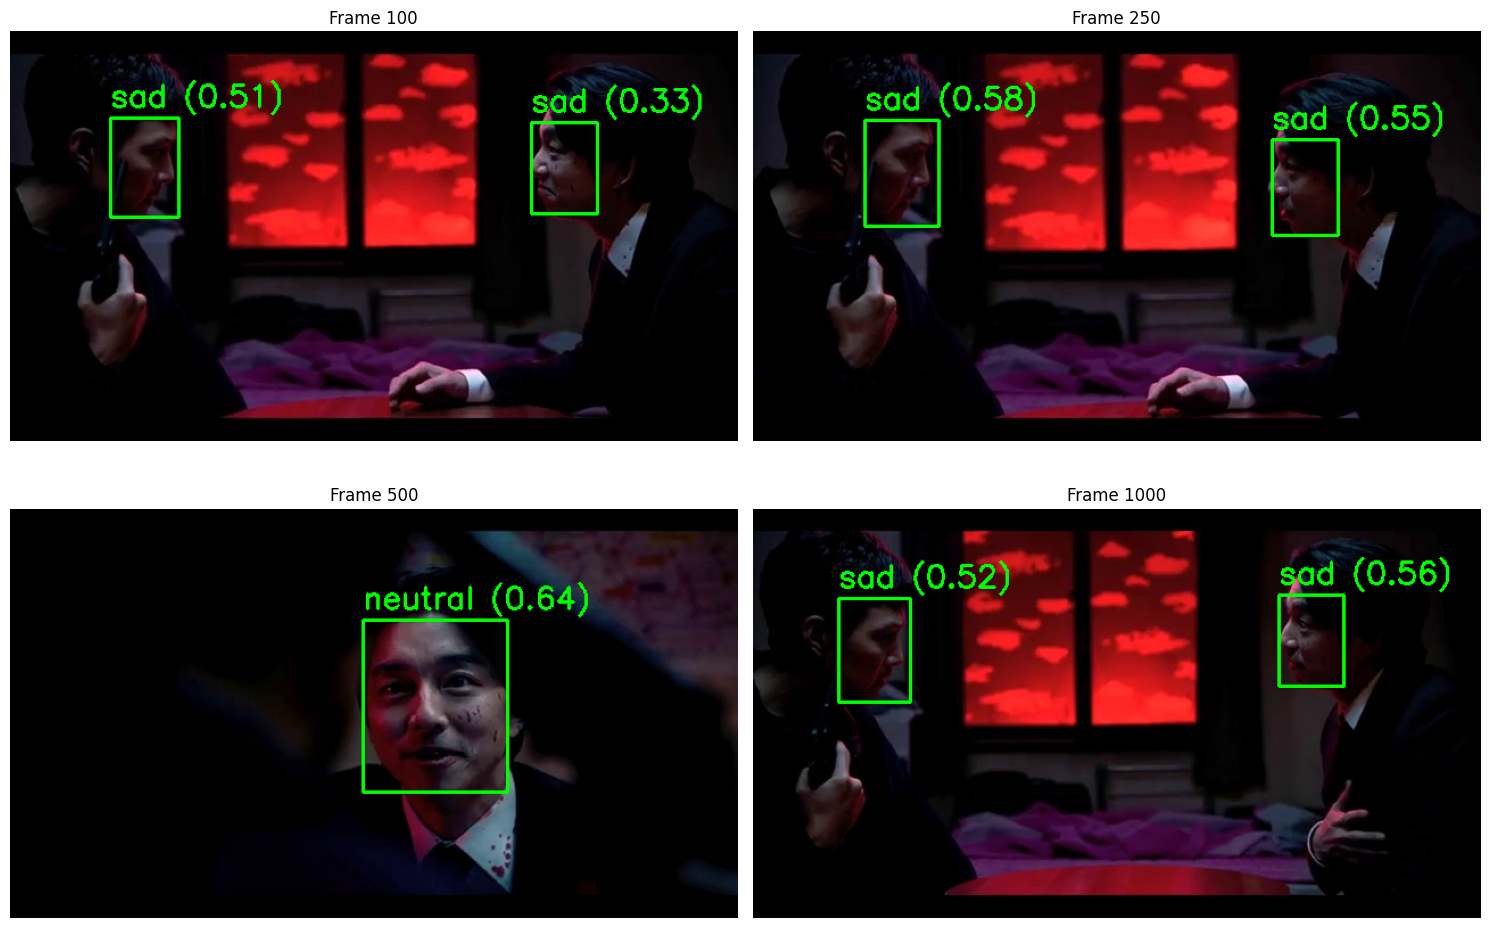

In [ ]:
import cv2
import matplotlib.pyplot as plt

# ÌôïÏù∏Ìï† ÏÉòÌîå ÌîÑÎ†àÏûÑ Ïù∏Îç±Ïä§
sample_indices = [100, 250, 500, 1000]

plt.figure(figsize=(15, 10))

for i, frame_idx in enumerate(sample_indices):
    frame_path = frames[frame_idx]
    results_in_frame = emotion_results_per_frame[frame_idx]

    # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ Î°úÎìú
    img = cv2.imread(frame_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # ÌÉêÏßÄÎêú Í∞Å ÏñºÍµ¥Ïóê ÎåÄÌï¥ Î∞ïÏä§ÏôÄ Í∞êÏ†ï ÌÖçÏä§Ìä∏ Í∑∏Î¶¨Í∏∞
    if results_in_frame:
        for face_result in results_in_frame:
            box = face_result['box']
            # top_emotion() Î©îÏÜåÎìúÎäî Ï†úÍ≥µÎêòÏßÄ ÏïäÏúºÎØÄÎ°ú, emotions ÎîïÏÖîÎÑàÎ¶¨ÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ Í∞íÏùÑ Í∞ÄÏßÑ Í∞êÏ†ïÏùÑ Ï∞æÏäµÎãàÎã§.
            emotions = face_result['emotions']
            top_emotion = max(emotions, key=emotions.get)
            top_score = emotions[top_emotion]

            x, y, w, h = box
            # ÏñºÍµ¥ Ï£ºÏúÑÏóê ÏÇ¨Í∞ÅÌòï Í∑∏Î¶¨Í∏∞
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            # Í∞êÏ†ï ÌÖçÏä§Ìä∏ ÌëúÏãú
            text = f"{top_emotion} ({top_score:.2f})"
            cv2.putText(img, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # MatplotlibÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.title(f"Frame {frame_idx}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Í∞êÏ†ï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Î∞è ÏãúÍ∞ÅÌôîÏö© Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

**Reasoning**: Î∂ÑÏÑùÎêú ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞(`emotion_results_per_frame`)Îäî ÌîÑÎ†àÏûÑÎßàÎã§ Ïó¨Îü¨ ÏñºÍµ¥ Ï†ïÎ≥¥Í∞Ä Ìè¨Ìï®Îêú Î≥µÏû°Ìïú Íµ¨Ï°∞ÏûÖÎãàÎã§. ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÍ≥µÌïòÏó¨ Í∞Å ÌîÑÎ†àÏûÑÏùÑ ÎåÄÌëúÌïòÎäî Îã®Ïùº Í∞êÏ†ïÏùÑ Ï∂îÏ∂úÌï©ÎãàÎã§. Ïó¨Í∏∞ÏÑúÎäî ÌîÑÎ†àÏûÑ ÎÇ¥ Î™®Îì† ÏñºÍµ¥Ïùò Í∞êÏ†ï Ï†êÏàòÎ•º Ìï©ÏÇ∞ÌïòÏó¨ Í∞ÄÏû• Ï¥ùÏ†êÏù¥ ÎÜíÏùÄ Í∞êÏ†ïÏùÑ Ìï¥Îãπ ÌîÑÎ†àÏûÑÏùò ÎåÄÌëú Í∞êÏ†ïÏúºÎ°ú ÏÇºÎäî Î∞©ÏãùÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

In [ ]:
import pandas as pd

print("Í∞êÏ†ï Î∂ÑÏÑù Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÏö© Îç∞Ïù¥ÌÑ∞Î°ú Í∞ÄÍ≥µÌï©ÎãàÎã§.")

processed_emotions = []
# Í∞Å ÌîÑÎ†àÏûÑÎ≥ÑÎ°ú Ï≤òÎ¶¨
for frame_results in emotion_results_per_frame:
    if not frame_results:
        # ÏñºÍµ¥Ïù¥ ÌÉêÏßÄÎêòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ 'neutral'Î°ú Ï≤òÎ¶¨
        processed_emotions.append({'emotion': 'neutral', 'score': 0.5})
        continue

    # ÌîÑÎ†àÏûÑ ÎÇ¥ Î™®Îì† ÏñºÍµ¥Ïùò Í∞êÏ†ï Ï†êÏàòÎ•º Ìï©ÏÇ∞
    frame_emotion_scores = {}
    for face in frame_results:
        for emotion, score in face['emotions'].items():
            if emotion not in frame_emotion_scores:
                frame_emotion_scores[emotion] = 0
            frame_emotion_scores[emotion] += score

    # Í∞ÄÏû• Ï†êÏàòÍ∞Ä ÎÜíÏùÄ Í∞êÏ†ïÏùÑ Ìï¥Îãπ ÌîÑÎ†àÏûÑÏùò ÎåÄÌëú Í∞êÏ†ïÏúºÎ°ú ÏÑ†ÌÉù
    if not frame_emotion_scores:
         top_emotion = 'neutral'
         top_score = 0.5
    else:
        top_emotion = max(frame_emotion_scores, key=frame_emotion_scores.get)
        # Ï†êÏàòÎäî Ï†ïÍ∑úÌôîÌïòÏó¨ 0~1 ÏÇ¨Ïù¥ Í∞íÏúºÎ°ú ÌëúÌòÑ (Í∞ÄÏû• ÎÜíÏùÄ Ï†êÏàò / Ï†ÑÏ≤¥ Ï†êÏàò Ìï©)
        total_score = sum(frame_emotion_scores.values())
        top_score = frame_emotion_scores[top_emotion] / total_score if total_score > 0 else 0

    processed_emotions.append({'emotion': top_emotion, 'score': top_score})

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ ÌôïÏù∏
emotion_df = pd.DataFrame(processed_emotions)
print("Îç∞Ïù¥ÌÑ∞ Í∞ÄÍ≥µ ÏôÑÎ£å. ÏÉÅÏúÑ 5Í∞ú Í≤∞Í≥º:")
print(emotion_df.head())
print("\nÌîÑÎ†àÏûÑÎ≥Ñ ÎåÄÌëú Í∞êÏ†ï Î∂ÑÌè¨:")
print(emotion_df['emotion'].value_counts())

Í∞êÏ†ï Î∂ÑÏÑù Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÏö© Îç∞Ïù¥ÌÑ∞Î°ú Í∞ÄÍ≥µÌï©ÎãàÎã§.
Îç∞Ïù¥ÌÑ∞ Í∞ÄÍ≥µ ÏôÑÎ£å. ÏÉÅÏúÑ 5Í∞ú Í≤∞Í≥º:
   emotion     score
0  neutral  0.500000
1    angry  0.410000
2    angry  0.464646
3    angry  0.420000
4    angry  0.415842

ÌîÑÎ†àÏûÑÎ≥Ñ ÎåÄÌëú Í∞êÏ†ï Î∂ÑÌè¨:
emotion
sad         2929
neutral     1710
happy        264
angry        231
fear          19
surprise      14
Name: count, dtype: int64


## Í∞êÏ†ï ÌÉÄÏûÑÎùºÏù∏ Í∑∏ÎûòÌîÑ ÏÉùÏÑ±

**Reasoning**: Í∞ÄÍ≥µÎêú Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏòÅÏÉÅ Ï†ÑÏ≤¥Ïùò Í∞êÏ†ï Î≥ÄÌôîÎ•º ÌïúÎààÏóê Î≥º Ïàò ÏûàÎäî ÌÉÄÏûÑÎùºÏù∏ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§. Ïù¥ Í∑∏ÎûòÌîÑÎäî ÏµúÏ¢Ö ÏòÅÏÉÅÏùò ÌïòÎã®Ïóê Ï∂îÍ∞ÄÎêòÏñ¥ ÏãúÍ∞ÅÏ†ÅÏù∏ Î∂ÑÏÑùÏùÑ ÎèïÏäµÎãàÎã§. MatplotlibÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±ÌïòÍ≥† Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎ°ú Ï†ÄÏû•Ìï©ÎãàÎã§.

In [ ]:
import matplotlib.pyplot as plt
import cv2

def create_emotion_timeline_plot(emotions_df, width):
    # Í∞êÏ†ï Ï¢ÖÎ•òÎ≥ÑÎ°ú ÌÉÄÏûÑÎùºÏù∏ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
    unique_emotions = sorted(emotions_df['emotion'].unique()) # Í∞êÏ†ï ÏàúÏÑúÎ•º ÏùºÏ†ïÌïòÍ≤å Ï†ïÎ†¨
    time = range(len(emotions_df))

    plt.figure(figsize=(width / 100, 2.5)) # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏßÄÏ†ï (ÎÑàÎπÑÎäî ÏòÅÏÉÅÏóê ÎßûÏ∂îÍ≥† ÎÜíÏù¥Îäî Í≥†Ï†ï)

    # Í∞Å Í∞êÏ†ïÏóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞Î•º ÏåìÏïÑÏÑú ÌëúÌòÑ (Stacked Area Chart)
    # Í∞Å ÏãúÍ∞Ñ tÏóêÏÑúÏùò yÍ∞íÏùÄ Ìï¥Îãπ Í∞êÏ†ïÏùò ÎàÑÏ†ÅÌï©
    y_values = {emo: [1 if e == emo else 0 for e in emotions_df['emotion']] for emo in unique_emotions}

    plt.stackplot(time, y_values.values(), labels=y_values.keys(), alpha=0.8)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small') # Î≤îÎ°ÄÎ•º Í∑∏ÎûòÌîÑ Î∞ñÏóê ÌëúÏãú
    plt.axis('off') # Ï∂ï Ï†ïÎ≥¥Îäî Î≥¥Ïù¥ÏßÄ ÏïäÍ≤å Ï≤òÎ¶¨
    plt.tight_layout(pad=0)
    plt.savefig("emotion_timeline.png", bbox_inches='tight', pad_inches=0.1, dpi=100) # Í∑∏ÎûòÌîÑÎ•º Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎ°ú Ï†ÄÏû•
    plt.close()

# ÏòÅÏÉÅ ÌîÑÎ†àÏûÑÏùò ÎÑàÎπÑÎ•º Í∞ÄÏ†∏ÏôÄÏÑú Í∑∏ÎûòÌîÑ ÎÑàÎπÑÎ•º ÎßûÏ∂§
sample_frame = cv2.imread(frames[0])
frame_height, frame_width, _ = sample_frame.shape

print(f"ÏòÅÏÉÅ ÎÑàÎπÑ({frame_width}px)Ïóê ÎßûÏ∂∞ Í∞êÏ†ï ÌÉÄÏûÑÎùºÏù∏ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.")
create_emotion_timeline_plot(emotion_df, frame_width)
print("Í∑∏ÎûòÌîÑ 'emotion_timeline.png'Í∞Ä ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.")

ÏòÅÏÉÅ ÎÑàÎπÑ(640px)Ïóê ÎßûÏ∂∞ Í∞êÏ†ï ÌÉÄÏûÑÎùºÏù∏ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
Í∑∏ÎûòÌîÑ 'emotion_timeline.png'Í∞Ä ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.


#  ÏµúÏ¢Ö ÏòÅÏÉÅ Ï†úÏûë

**Reasoning**: Ïù¥Ï†ú Î™®Îì† Ï§ÄÎπÑÍ∞Ä ÎÅùÎÇ¨ÏäµÎãàÎã§. Ïù¥ Îã®Í≥ÑÏóêÏÑúÎäî ÏõêÎ≥∏ ÎπÑÎîîÏò§Ïùò Í∞Å ÌîÑÎ†àÏûÑ, Ìï¥Îãπ ÌîÑÎ†àÏûÑÏóêÏÑú ÌÉêÏßÄÎêú Î™®Îì† ÏñºÍµ¥Ïùò Í≤ΩÍ≥Ñ ÏÉÅÏûêÏôÄ Í∞êÏ†ï Î†àÏù¥Î∏î, Í∑∏Î¶¨Í≥† Ïù¥Ï†ÑÏóê ÏÉùÏÑ±Ìïú Í∞êÏ†ï ÌÉÄÏûÑÎùºÏù∏ Í∑∏ÎûòÌîÑÎ•º ÌïòÎÇòÎ°ú Ìï©ÏπòÎäî ÏûëÏóÖÏùÑ ÏàòÌñâÌï©ÎãàÎã§. `cv2.VideoWriter`Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ Î™®Îì† ÏöîÏÜåÍ∞Ä Ìè¨Ìï®Îêú ÏµúÏ¢Ö ÎπÑÎîîÏò§ ÌååÏùºÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.

In [ ]:
import cv2
import numpy as np
from tqdm.notebook import tqdm

print("ÏµúÏ¢Ö ÏòÅÏÉÅ Ìï©ÏÑ±ÏùÑ ÏãúÏûëÌï©ÎãàÎã§. Ïù¥ ÏûëÏóÖÏùÄ Îã§ÏÜå ÏãúÍ∞ÑÏù¥ Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§.")

# Í∑∏ÎûòÌîÑ Ïù¥ÎØ∏ÏßÄ Î°úÎìú
graph_img = cv2.imread("emotion_timeline.png", cv2.IMREAD_UNCHANGED)

# Í∑∏ÎûòÌîÑ Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º ÏòÅÏÉÅ ÎÑàÎπÑÏóê ÎßûÍ≤å Ï°∞Ï†ï
graph_h, graph_w, _ = graph_img.shape
new_graph_w = frame_width
# ÏõêÎ≥∏ ÎπÑÏú®ÏùÑ Ïú†ÏßÄÌïòÎ©¥ÏÑú ÎÑàÎπÑ Ï°∞Ï†ï
new_graph_h = int(graph_h * (new_graph_w / graph_w))
graph_img_resized = cv2.resize(graph_img, (new_graph_w, new_graph_h))

# ÏµúÏ¢Ö ÏòÅÏÉÅ ÏÑ§Ï†ïÏùÑ ÏúÑÌïú VideoWriter Í∞ùÏ≤¥ ÏÉùÏÑ±
output_video_path = "final_emotion_video.mp4"
# mp4 Ìè¨Îß∑ÏùÑ ÏúÑÌï¥ 'mp4v' ÏΩîÎç± ÏÇ¨Ïö©
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# fpsÎäî ÏõêÎ≥∏ ÏòÅÏÉÅÏùò fpsÎ•º ÏÇ¨Ïö©
# ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞Îäî (ÏõêÎ≥∏ ÎÑàÎπÑ, ÏõêÎ≥∏ ÎÜíÏù¥ + Í∑∏ÎûòÌîÑ ÎÜíÏù¥)
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height + new_graph_h))

# Í∞Å ÌîÑÎ†àÏûÑÏóê ÎåÄÌï¥ ÏûëÏóÖ ÏàòÌñâ
for i, frame_path in enumerate(tqdm(frames, desc="ÏòÅÏÉÅ Ìï©ÏÑ± Ï§ë")):
    frame = cv2.imread(frame_path)
    frame_results = emotion_results_per_frame[i]

    # Ìï¥Îãπ ÌîÑÎ†àÏûÑÏóê ÌÉêÏßÄÎêú ÏñºÍµ¥Ïù¥ ÏûàÏúºÎ©¥ Î∞ïÏä§ÏôÄ Í∞êÏ†ï ÌÖçÏä§Ìä∏Î•º Í∑∏Î¶º
    if frame_results:
        for face in frame_results:
            x, y, w, h = face['box']
            emotions = face['emotions']
            top_emotion = max(emotions, key=emotions.get)
            score = emotions[top_emotion]

            # Î∞ïÏä§ Í∑∏Î¶¨Í∏∞
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # ÌÖçÏä§Ìä∏ Í∑∏Î¶¨Í∏∞
            text = f"{top_emotion} ({score:.2f})"
            cv2.putText(frame, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # ÌîÑÎ†àÏûÑÍ≥º Í∑∏ÎûòÌîÑ Ïù¥ÎØ∏ÏßÄÎ•º Ìï©ÏπòÍ∏∞ ÏúÑÌïú Î∞∞Í≤Ω ÏÉùÏÑ±
    combined_frame = np.full((frame_height + new_graph_h, frame_width, 3), (0, 0, 0), dtype=np.uint8)
    # ÏõêÎ≥∏ ÌîÑÎ†àÏûÑ Î∂ôÏó¨ÎÑ£Í∏∞
    combined_frame[0:frame_height, 0:frame_width] = frame
    # Í∑∏ÎûòÌîÑ Î∂ôÏó¨ÎÑ£Í∏∞ (ÏïåÌåå Ï±ÑÎÑê Í≥†Î†§)
    y_offset = frame_height
    alpha_s = graph_img_resized[:, :, 3] / 255.0
    alpha_l = 1.0 - alpha_s
    for c in range(0, 3):
        combined_frame[y_offset:y_offset+new_graph_h, 0:new_graph_w, c] = (alpha_s * graph_img_resized[:, :, c] + \
                                                               alpha_l * combined_frame[y_offset:y_offset+new_graph_h, 0:new_graph_w, c])

    out.write(combined_frame)

out.release()
print(f"\nÏµúÏ¢Ö ÏòÅÏÉÅÏù¥ '{output_video_path}' Í≤ΩÎ°úÏóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

ÏµúÏ¢Ö ÏòÅÏÉÅ Ìï©ÏÑ±ÏùÑ ÏãúÏûëÌï©ÎãàÎã§. Ïù¥ ÏûëÏóÖÏùÄ Îã§ÏÜå ÏãúÍ∞ÑÏù¥ Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§.


ÏòÅÏÉÅ Ìï©ÏÑ± Ï§ë:   0%|          | 0/5167 [00:00<?, ?it/s]


ÏµúÏ¢Ö ÏòÅÏÉÅÏù¥ 'final_emotion_video.mp4' Í≤ΩÎ°úÏóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


# Phase4+. Î™®Îç∏ Î∞è Îç∞Ïù¥ÌÑ∞ÏÖã Î≥ÄÍ≤Ω

### Î™®Îç∏ ÏÑ±Îä• Í∞úÏÑ†ÏùÑ ÏúÑÌïú Task Í≥ÑÌöç

1.  **ÎßûÏ∂§Ìòï Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑ**: Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Í∏∞ ÏúÑÌï¥ Í∞ÄÏû• Ï§ëÏöîÌïú Îã®Í≥ÑÏûÖÎãàÎã§. 'Î∂ÑÎÖ∏', 'Í≥µÌè¨', 'Ïä¨Ìîî' Îì± Í∞Å Í∞êÏ†ïÎ≥ÑÎ°ú ÎùºÎ≤®ÎßÅÎêú ÏñºÍµ¥ Ïù¥ÎØ∏ÏßÄÎ•º Ï§ÄÎπÑÌï©ÎãàÎã§. Í∏∞Ï°¥ Í≥µÍ∞ú Îç∞Ïù¥ÌÑ∞ÏÖã(FER-2013, AffectNet Îì±)ÏùÑ ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò, ÌòÑÏû¨ ÏòÅÏÉÅÏóêÏÑú ÏßÅÏ†ë ÌîÑÎ†àÏûÑÏùÑ Ï∂îÏ∂úÌïòÍ≥† ÏàòÎèôÏúºÎ°ú ÎùºÎ≤®ÏùÑ ÏßÄÏ†ïÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Íµ¨Ï∂ïÌï† Ïàò ÏûàÏäµÎãàÎã§.

2.  **Î™®Îç∏ ÏïÑÌÇ§ÌÖçÏ≤ò Íµ¨ÏÑ±**: ÏÉàÎ°úÏö¥ Î™®Îç∏ÏùÑ Ï≤òÏùåÎ∂ÄÌÑ∞ ÎßåÎìúÎäî ÎåÄÏã†, Ïù¥ÎØ∏ÏßÄ Î∂ÑÎ•òÏóê Îõ∞Ïñ¥ÎÇú ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥Îäî Í∏∞Ï°¥ Î™®Îç∏(Ïòà: VGG16, ResNet)ÏùÑ Í∏∞Î∞òÏúºÎ°ú Í∞êÏ†ï Î∂ÑÎ•òÏóê ÎßûÍ≤å Íµ¨Ï°∞Î•º ÏùºÎ∂Ä ÏàòÏ†ïÌïòÎäî 'Ï†ÑÏù¥ ÌïôÏäµ(Transfer Learning)' Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§. Ïù¥Î†áÍ≤å ÌïòÎ©¥ Îçî Ï†ÅÏùÄ Îç∞Ïù¥ÌÑ∞Î°úÎèÑ ÎÜíÏùÄ ÏÑ±Îä•ÏùÑ ÎÇº Ïàò ÏûàÏäµÎãàÎã§.

3.  **Î™®Îç∏ ÌïôÏäµ Ïã§Ìñâ**: Ï§ÄÎπÑÎêú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇµÎãàÎã§. Ïù¥ Í≥ºÏ†ïÏóêÏÑú Î™®Îç∏ÏùÄ Í∞Å Í∞êÏ†ïÍ≥º ÏñºÍµ¥ Ïù¥ÎØ∏ÏßÄÏùò ÌäπÏßï ÏÇ¨Ïù¥Ïùò Í¥ÄÍ≥ÑÎ•º ÌïôÏäµÌïòÍ≤å Îê©ÎãàÎã§. ÌïôÏäµ ÏßÑÌñâ ÏÉÅÌô©Í≥º ÏÜêÏã§Í∞í/Ï†ïÌôïÎèÑ Î≥ÄÌôîÎ•º ÏãúÍ∞ÅÌôîÌïòÏó¨ ÌôïÏù∏Ìï©ÎãàÎã§.

4.  **ÌïôÏäµÎêú Î™®Îç∏ ÌèâÍ∞Ä**: ÌïôÏäµÏù¥ ÏôÑÎ£åÎêú Î™®Îç∏Ïù¥ 'Î∂ÑÎÖ∏'ÏôÄ 'Í≥µÌè¨' Í∞ôÏùÄ ÌäπÏ†ï Í∞êÏ†ïÏùÑ ÏñºÎßàÎÇò Ïûò ÏòàÏ∏°ÌïòÎäîÏßÄ ÌèâÍ∞ÄÌï©ÎãàÎã§. ÌòºÎèô ÌñâÎ†¨(Confusion Matrix)Í≥º Í∞ôÏùÄ ÏßÄÌëúÎ•º ÌÜµÌï¥ Ïñ¥Îñ§ Í∞êÏ†ïÏùÑ ÌòºÎèôÌïòÎäîÏßÄ Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú Î∂ÑÏÑùÌï©ÎãàÎã§.

5.  **ÏÉàÎ°úÏö¥ Î™®Îç∏Î°ú ÍµêÏ≤¥ Î∞è Ï∂îÎ°†**: ÏÑ±Îä•Ïù¥ Í∞úÏÑ†Îêú ÏÉàÎ°úÏö¥ Î™®Îç∏ÏùÑ Í∏∞Ï°¥ Î∂ÑÏÑù ÌååÏù¥ÌîÑÎùºÏù∏Ïóê ÌÜµÌï©Ìï©ÎãàÎã§. Í∏∞Ï°¥ `FER` ÎùºÏù¥Î∏åÎü¨Î¶¨ ÎåÄÏã† Ïö∞Î¶¨Í∞Ä ÏßÅÏ†ë ÌïôÏäµÏãúÌÇ® Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞êÏ†ï Î∂ÑÏÑùÏùÑ Îã§Ïãú ÏàòÌñâÌïòÍ≥†, Í≤∞Í≥ºÍ∞Ä Í∞úÏÑ†ÎêòÏóàÎäîÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.

6.  **Finish task**: ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Í∞úÏÑ†Îêú Î™®Îç∏ÏùÑ ÌÜµÌï¥ ÏñªÏùÄ Í∞êÏ†ï Î∂ÑÏÑù Í≤∞Í≥ºÎ•º ÏöîÏïΩÌïòÍ≥†, Ï¥àÍ∏∞ Î™®Îç∏Ïùò ÌïúÍ≥ÑÍ∞Ä Ïñ¥ÎñªÍ≤å Í∑πÎ≥µÎêòÏóàÎäîÏßÄ Ï†ïÎ¶¨Ìï©ÎãàÎã§.

ÌôòÍ≤Ω ÏÑ§Ï†ï: YOLOv8 Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌïú ultralytics ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÑ§ÏπòÌïòÍ≥†, Kaggle Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îã§Ïö¥Î°úÎìúÌïòÍ∏∞ ÏúÑÌïú ÌôòÍ≤ΩÏùÑ Íµ¨ÏÑ±Ìï©ÎãàÎã§.
Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú: Ï†úÏïàÌï¥Ï£ºÏã† AffectNet YOLO Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ KaggleÏóêÏÑú Îã§Ïö¥Î°úÎìúÌïòÍ≥† ÏïïÏ∂ïÏùÑ Ìï¥Ï†úÌï©ÎãàÎã§. Ïù¥Î•º ÏúÑÌï¥ Kaggle API ÌÇ§ ÏÑ§Ï†ïÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.
YOLO ÌïôÏäµ Íµ¨ÏÑ±: YOLO Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌïôÏäµÌï† Ïàò ÏûàÎèÑÎ°ù, Îç∞Ïù¥ÌÑ∞Ïùò Í≤ΩÎ°úÏôÄ Í∞êÏ†ï ÌÅ¥ÎûòÏä§(angry, happy, sad Îì±) Ï†ïÎ≥¥Í∞Ä Îã¥Í∏¥ YAML ÏÑ§Ï†ï ÌååÏùºÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
YOLO Î™®Îç∏ ÌïôÏäµ: ÏÇ¨Ï†Ñ ÌïôÏäµÎêú YOLOv8 Î™®Îç∏ÏùÑ Í∏∞Î∞òÏúºÎ°ú, Ï§ÄÎπÑÎêú AffectNet Í∞êÏ†ï Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ï†ÑÏù¥ ÌïôÏäµ(fine-tuning)ÏùÑ ÏãúÏûëÌï©ÎãàÎã§. ÌïôÏäµÏù¥ ÏßÑÌñâÎêòÎäî ÎèôÏïà ÏÑ±Îä•ÏùÑ Î™®ÎãàÌÑ∞ÎßÅÌï©ÎãàÎã§.
ÌïôÏäµÎêú Î™®Îç∏Î°ú Ï∂îÎ°† Ïã§Ìñâ: ÌïôÏäµÎêú Î™®Îç∏ Ï§ë Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄ Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∏∞Ï°¥ ÏòÅÏÉÅÏùò Î™®Îì† ÌîÑÎ†àÏûÑÏóê ÎåÄÌï¥ Îã§Ïãú Í∞êÏ†ï Î∂ÑÏÑùÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
ÏãúÍ∞ÅÌôî Î°úÏßÅ Ïû¨Íµ¨ÏÑ± Î∞è ÏòÅÏÉÅ ÏÉùÏÑ±: ÏÉàÎ°úÏö¥ YOLO Î™®Îç∏Ïùò Ï∂úÎ†• ÌòïÏãùÏóê ÎßûÍ≤å Í∞êÏ†ï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Î∞è ÏãúÍ∞ÅÌôî ÏΩîÎìúÎ•º ÏàòÏ†ïÌï©ÎãàÎã§. ÏñºÍµ¥ Í≤ΩÍ≥Ñ ÏÉÅÏûêÏôÄ Í∞êÏ†ï Î†àÏù¥Î∏î, Í∑∏Î¶¨Í≥† ÌÉÄÏûÑÎùºÏù∏ Í∑∏ÎûòÌîÑÎ•º Ìè¨Ìï®Ìïú ÏµúÏ¢Ö ÏòÅÏÉÅÏùÑ Îã§Ïãú Ï†úÏûëÌï©ÎãàÎã§.
Finish task: Ï¥àÍ∏∞ FER ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÇ¨Ïö©ÌñàÏùÑ ÎïåÏùò ÌïúÍ≥ÑÏôÄ, ÏßÅÏ†ë ÌïôÏäµÏãúÌÇ® YOLO Î™®Îç∏ÏùÑ ÌÜµÌï¥ Ïñ¥ÎñªÍ≤å ÏÑ±Îä•Ïù¥ Í∞úÏÑ†ÎêòÏóàÎäîÏßÄ ÎπÑÍµê Î∂ÑÏÑùÌïòÍ≥† ÏµúÏ¢Ö Í≤∞Í≥ºÎ•º ÏöîÏïΩÌï©ÎãàÎã§.

# ÌôòÍ≤Ω ÏÑ§Ï†ï

### Subtask:
YOLOv8 Î∞è Kaggle ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÑ§ÏπòÌïòÏó¨ Î™®Îç∏ ÌïôÏäµ Î∞è Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú ÌôòÍ≤ΩÏùÑ Íµ¨ÏÑ±Ìï©ÎãàÎã§.

**Reasoning**: YOLOv8 Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌïú `ultralytics` ÎùºÏù¥Î∏åÎü¨Î¶¨ÏôÄ Kaggle Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îã§Ïö¥Î°úÎìúÌïòÍ∏∞ ÏúÑÌïú `kaggle` ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÑ§ÏπòÌïòÏó¨ Í∞úÎ∞ú ÌôòÍ≤ΩÏùÑ Ï§ÄÎπÑÌï©ÎãàÎã§.

In [ ]:
!pip install ultralytics kaggle --quiet

print("ÌïÑÏàò ÎùºÏù¥Î∏åÎü¨Î¶¨(ultralytics, kaggle) ÏÑ§ÏπòÍ∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.0/1.0 MB 20.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 5.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 117.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 92.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 76.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

# Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú

### Subtask:
Ï†úÏïàÌï¥Ï£ºÏã† AffectNet YOLO Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ KaggleÏóêÏÑú Îã§Ïö¥Î°úÎìúÌïòÍ≥† ÏïïÏ∂ïÏùÑ Ìï¥Ï†úÌï©ÎãàÎã§. Ïù¥Î•º ÏúÑÌï¥ Kaggle API ÌÇ§ ÏÑ§Ï†ïÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.

**Reasoning**: Kaggle APIÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ïù∏Ï¶ùÌïòÍ≥†, 'affectnet-yolo-format' Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îã§Ïö¥Î°úÎìúÌïú ÌõÑ, ÏûëÏóÖ ÎîîÎ†âÌÜ†Î¶¨Ïóê ÏïïÏ∂ïÏùÑ Ìï¥Ï†úÌïòÏó¨ Î™®Îç∏ ÌïôÏäµÏóê ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎèÑÎ°ù Ï§ÄÎπÑÌï©ÎãàÎã§.

In [ ]:
!pip install google-cloud-secret-manager --quiet

import json

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 218.1/218.1 kB 4.4 MB/s eta 0:00:00


In [ ]:
# prompt: Íµ¨Í∏Ä ÏãúÌÅ¨Î¶ø Îß§ÎãàÏ†ÄÏóê Ï†ëÍ∑ºÌï¥ÏÑú, 'kaggle-api-key'  ÌÇ§Í∞íÏùò Î∞∏Î•òÎ•º Í∞ÄÏ†∏ÏôÄ kaggle.jsonÏúºÎ°ú Ï†ÄÏû•

import json
from google.cloud import secretmanager

# Google Cloud project ID Í∞ÄÏ†∏Ïò§Í∏∞
project_id = 'sesac-ljj0210' # 'YOUR_PROJECT_ID'Î•º Ïã§Ï†ú ÌîÑÎ°úÏ†ùÌä∏ IDÎ°ú Î≥ÄÍ≤Ω
if not project_id:
    raise ValueError("ÌîÑÎ°úÏ†ùÌä∏ IDÎ•º ÏÑ§Ï†ïÌï¥Ïïº Ìï©ÎãàÎã§.")

# Secret ManagerÏóêÏÑú Kaggle API ÌÇ§ Í∞ÄÏ†∏Ïò§Í∏∞
client = secretmanager.SecretManagerServiceClient()
name = f"projects/{project_id}/secrets/kaggle-api-key/versions/latest"
response = client.access_secret_version(name=name)
payload = response.payload.data.decode('UTF-8')

# JSON Îç∞Ïù¥ÌÑ∞ ÌååÏã± Î∞è Ï†ÄÏû•
kaggle_api_key = json.loads(payload)
with open('kaggle.json', 'w') as f:
    json.dump(kaggle_api_key, f)

# Kaggle API ÏÑ§Ï†ï
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("Kaggle API ÌÇ§ ÏÑ§Ï†ïÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

Kaggle API ÌÇ§ ÏÑ§Ï†ïÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.


In [ ]:
import kagglehub
import os

# kagglehub.dataset_downloadÎäî ÏûêÎèôÏúºÎ°ú ÏïïÏ∂ïÏùÑ Ìï¥Ï†úÌïòÍ≥† Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í≤ΩÎ°úÎ•º Î∞òÌôòÌï©ÎãàÎã§.
path = kagglehub.dataset_download("fatihkgg/affectnet-yolo-format")
print("Path to dataset files:", path)

# ÏïÑÎûò unzip Î™ÖÎ†πÏñ¥Îäî kagglehubÏù¥ Ïù¥ÎØ∏ ÏïïÏ∂ïÏùÑ Ìï¥Ï†úÌñàÏúºÎØÄÎ°ú Î∂àÌïÑÏöîÌïòÎ©∞ Ïò§Î•òÎ•º Ïú†Î∞úÌï©ÎãàÎã§.
# !unzip -q {path}

print("\nÎç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú Î∞è Ï§ÄÎπÑÍ∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")
print("Îç∞Ïù¥ÌÑ∞ÏÖã ÏúÑÏπò:", path)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 258M/258M [00:01<00:00, 203MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/fatihkgg/affectnet-yolo-format/versions/2

Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú Î∞è Ï§ÄÎπÑÍ∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.
Îç∞Ïù¥ÌÑ∞ÏÖã ÏúÑÏπò: /root/.cache/kagglehub/datasets/fatihkgg/affectnet-yolo-format/versions/2


In [ ]:
import shutil
import os

# kagglehub Îã§Ïö¥Î°úÎìú Í≤ΩÎ°ú (Ïù¥Ï†Ñ ÏÖÄÏùò 'path' Î≥ÄÏàò)
source_path = str(path)

# Î≥µÏÇ¨Ìï† ÏÉàÎ°úÏö¥ ÏúÑÏπò
target_path = "/content/affectnet_dataset"

# ÎßåÏïΩ Ìè¥ÎçîÍ∞Ä Ïù¥ÎØ∏ Ï°¥Ïû¨ÌïúÎã§Î©¥, Íπ®ÎÅóÌïú Î≥µÏÇ¨Î•º ÏúÑÌï¥ ÏÇ≠Ï†úÌï©ÎãàÎã§.
if os.path.exists(target_path):
    shutil.rmtree(target_path)

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖã ÎîîÎ†âÌÜ†Î¶¨Î•º Î≥µÏÇ¨Ìï©ÎãàÎã§.
shutil.copytree(source_path, target_path)

print(f"Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ '{source_path}'ÏóêÏÑú '{target_path}'Î°ú ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î≥µÏÇ¨ÌñàÏäµÎãàÎã§.")

Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ '/root/.cache/kagglehub/datasets/fatihkgg/affectnet-yolo-format/versions/2'ÏóêÏÑú '/content/affectnet_dataset'Î°ú ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î≥µÏÇ¨ÌñàÏäµÎãàÎã§.


In [ ]:
# prompt: /content/affectnet_dataset/YOLO_format/data.yaml  ÏïºÎÆ¨ÌååÏùº ÌôïÏù∏

!cat /content/affectnet_dataset/YOLO_format/data.yaml

data: "/kaggle/input/affectnet-yolo-format/YOLO_format"

train: "/kaggle/input/affectnet-yolo-format/YOLO_format/train/images"
val: "/kaggle/input/affectnet-yolo-format/YOLO_format/valid/images"
test: "/kaggle/input/affectnet-yolo-format/YOLO_format/test/images"

nc: 8

names:
  [
    "Anger",
    "Contempt",
    "Disgust",
    "Fear",
    "Happy",
    "Neutral",
    "Sad",
    "Surprise",
  ]

# Network configuration (choose other variations if desired)
network: "yolov8n"


In [ ]:
import yaml

# Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Î£®Ìä∏ Í≤ΩÎ°úÎ•º ÏßÄÏ†ïÌï©ÎãàÎã§.
dataset_path = "/content/affectnet_dataset/YOLO_format"

# YAML ÌååÏùº ÎÇ¥Ïö©ÏùÑ Ïã§Ï†ú ÎîîÎ†âÌÜ†Î¶¨ Íµ¨Ï°∞Ïóê ÎßûÍ≤å ÏàòÏ†ïÌï©ÎãàÎã§.
# train, val, test ÌÇ§ÏóêÎäî Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏù¥ Ìè¨Ìï®Îêú ÎîîÎ†âÌÜ†Î¶¨Ïùò ÏÉÅÎåÄ Í≤ΩÎ°úÎ•º ÏßÄÏ†ïÌï©ÎãàÎã§.
# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í≤ÄÏ¶ù Ìè¥Îçî Ïù¥Î¶ÑÏù¥ 'valid'Ïù¥ÎØÄÎ°ú Ïù¥Î•º Î∞òÏòÅÌï©ÎãàÎã§.
# ÌÅ¥ÎûòÏä§ Ïù¥Î¶ÑÍ≥º ÏàúÏÑúÎèÑ ÏõêÎ≥∏ data.yamlÍ≥º ÏùºÏπòÏãúÌÇµÎãàÎã§.
data_yaml = {
    'path': dataset_path,
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'nc': 8,  # ÌÅ¥ÎûòÏä§ Í∞úÏàò
    'names': ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
}

# ÏàòÏ†ïÎêú YAML ÌååÏùº Ï†ÄÏû•
with open('affectnet_data.yaml', 'w') as f:
    yaml.dump(data_yaml, f, default_flow_style=False, sort_keys=False)

print(f"'affectnet_data.yaml' ÌååÏùºÏù¥ Ïò¨Î∞îÎ•∏ Í≤ΩÎ°úÎ°ú ÏàòÏ†ïÎêòÏóàÏäµÎãàÎã§.")
print("--- ÏàòÏ†ïÎêú ÏÑ§Ï†ï ÌååÏùº ÎÇ¥Ïö© ---")
!cat affectnet_data.yaml
print("--------------------------")

'affectnet_data.yaml' ÌååÏùºÏù¥ Ïò¨Î∞îÎ•∏ Í≤ΩÎ°úÎ°ú ÏàòÏ†ïÎêòÏóàÏäµÎãàÎã§.
--- ÏàòÏ†ïÎêú ÏÑ§Ï†ï ÌååÏùº ÎÇ¥Ïö© ---
path: /content/affectnet_dataset/YOLO_format
train: train/images
val: valid/images
test: test/images
nc: 8
names:
- Anger
- Contempt
- Disgust
- Fear
- Happy
- Neutral
- Sad
- Surprise
--------------------------


# Yolov8_affectnetÎç∞Ïù¥ÌÑ∞ ÌïôÏäµ

In [ ]:
# prompt: Îã§Ïö¥Î°úÎìú Î∞õÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖã, ÏïºÎÆ¨ÌååÏùºÍ≥º Yolo8 Î™®Îç∏ÏùÑ Ïù¥Ïö©Ìï¥ ÌïôÏäµ ÏßÑÌñâ

# Ïù¥Ï†ÑÏóê ÏÉùÏÑ±Ìïú Ïò¨Î∞îÎ•∏ ÏÑ§Ï†ï ÌååÏùº 'affectnet_data.yaml'ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
!yolo train model=yolov8n.pt data=affectnet_data.yaml epochs=10 imgsz=640 batch=16

Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.175 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22574MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=affectnet_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, li

## ÌèâÍ∞Ä

In [ ]:
# prompt: /content/runs/detect/train/weights/best.pt  Î™®Îç∏ ÌèâÍ∞Ä

!yolo val model=/content/runs/detect/train/weights/best.pt data=affectnet_data.yaml

Ultralytics 8.3.175 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22574MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 428.5¬±374.5 MB/s, size: 8.3 KB)
val: Scanning /content/affectnet_dataset/YOLO_format/valid/labels.cache... 5406 images, 0 backgrounds, 0 corrupt: 100% 5406/5406 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 338/338 [00:28<00:00, 12.04it/s]
                   all       5406       5406      0.677      0.747       0.78       0.78
                 Anger        712        712       0.64      0.781      0.779      0.779
              Contempt        618        618      0.716      0.712      0.801      0.801
               Disgust        672        672      0.624      0.726      0.753      0.752
                  Fear        622        622      0.694      0.723      0.795      0.795
                 Happy      

In [ ]:
# prompt: Î™®Îç∏ÏùÑ sesac-ljj-20250715/pjt_cinefeel/model Î≤ÑÌÇ∑Ïóê ÏóÖÎ°úÎìú. {Î™®Îç∏}_{Îç∞Ïù¥ÌÑ∞ÏÖã}_{ÏóêÌè≠}ÏúºÎ°ú Ï†ÄÏû•

import os

# Î™®Îç∏ Í≤ΩÎ°ú
model_path = "/content/runs/detect/train/weights/best.pt"

# Î≤ÑÌÇ∑ Í≤ΩÎ°ú
bucket_path = "gs://sesac-ljj-20250715/pjt_cinefeel/model"

# Î™®Îç∏ Ïù¥Î¶Ñ, Îç∞Ïù¥ÌÑ∞ÏÖã, ÏóêÌè≠ Ï†ïÎ≥¥
model_name = "yolov8n"
dataset_name = "affectnet"
epochs = "10"  # epochs Í∞íÏùÑ Î≥ÄÏàòÏóêÏÑú Í∞ÄÏ†∏Ïò§Í±∞ÎÇò ÏßÅÏ†ë ÏßÄÏ†ï

# Ï†ÄÏû•Ìï† ÌååÏùº Ïù¥Î¶Ñ
file_name = f"{model_name}_{dataset_name}_{epochs}.pt"

# ÏóÖÎ°úÎìú Î™ÖÎ†πÏñ¥ Ïã§Ìñâ
!gsutil cp {model_path} {os.path.join(bucket_path, file_name)}

print(f"Î™®Îç∏Ïù¥ '{os.path.join(bucket_path, file_name)}'Ïóê ÏóÖÎ°úÎìúÎêòÏóàÏäµÎãàÎã§.")

Copying file:///content/runs/detect/train/weights/best.pt [Content-Type=application/vnd.snesdev-page-table]...
/ [1 files][  6.0 MiB/  6.0 MiB]                                                
Operation completed over 1 objects/6.0 MiB.                                      
Î™®Îç∏Ïù¥ 'gs://sesac-ljj-20250715/pjt_cinefeel/model/yolov8n_affectnet_10.pt'Ïóê ÏóÖÎ°úÎìúÎêòÏóàÏäµÎãàÎã§.


In [ ]:
# prompt: sesac-ljj-20250715/pjt_cinefeel/src/source_collector/result/photo/squid_game_example.zip ÏùÑ Í∞ÄÏ†∏ÏôÄÏÑú {ÌååÏùºÎ™Ö}_frames Ìè¥ÎçîÏóê unzip. Î∂ÑÏÑùÎåÄÏÉÅÎç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

import zipfile
import os

# Google Cloud StorageÏóêÏÑú zip ÌååÏùº Îã§Ïö¥Î°úÎìú
zip_file_gcs_path = "gs://sesac-ljj-20250715/pjt_cinefeel/src/source_collector/result/photo/squid_game_example.zip"
zip_file_local_path = "squid_game_example.zip"  # Î°úÏª¨ Ï†ÄÏû• Í≤ΩÎ°ú

!gsutil cp {zip_file_gcs_path} {zip_file_local_path}

# zip ÌååÏùº Ïù¥Î¶ÑÏóêÏÑú ÌôïÏû•ÏûêÎ•º Ï†úÏô∏Ìïú ÌååÏùºÎ™Ö Ï∂îÏ∂ú
file_name = os.path.splitext(zip_file_local_path)[0]

# ÏïïÏ∂ï Ìï¥Ï†úÌï† Ìè¥Îçî Í≤ΩÎ°ú ÏÉùÏÑ±
extract_dir = f"{file_name}_frames"

# Ìè¥Îçî ÏÉùÏÑ± (Ïù¥ÎØ∏ Ï°¥Ïû¨ÌïòÎäî Í≤ΩÏö∞ ÎçÆÏñ¥Ïì∞ÏßÄ ÏïäÏùå)
os.makedirs(extract_dir, exist_ok=True)

# zip ÌååÏùº ÏïïÏ∂ï Ìï¥Ï†ú
with zipfile.ZipFile(zip_file_local_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"'{zip_file_local_path}' ÌååÏùºÏù¥ '{extract_dir}' Ìè¥ÎçîÏóê ÏïïÏ∂ï Ìï¥Ï†úÎêòÏóàÏäµÎãàÎã§.")



Copying gs://sesac-ljj-20250715/pjt_cinefeel/src/source_collector/result/photo/squid_game_example.zip...
\
Operation completed over 1 objects/131.7 MiB.                                    
'squid_game_example.zip' ÌååÏùºÏù¥ 'squid_game_example_frames' Ìè¥ÎçîÏóê ÏïïÏ∂ï Ìï¥Ï†úÎêòÏóàÏäµÎãàÎã§.
ÏïïÏ∂ï Ìï¥Ï†úÎêú ÌîÑÎ†àÏûÑ ÌååÏùº Í∞úÏàò: 0


In [ ]:
# prompt: ÏñºÍµ¥ ÌÉêÏßÄ Î∞è Í∞êÏ†ï Î∂ÑÏÑù Ïã§Ïãú, Í≤∞Í≥º ÌååÏùº ÏãúÍ∞ÅÌôî Î∞è squid_game_example_result Î°ú ÏïïÏ∂ïÌïòÏó¨ sesac-ljj-20250715/pjt_cinefeel Î≤ÑÌÇ∑Ïóê Ï†ÄÏû•

import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np
from tqdm.notebook import tqdm
import zipfile

# YOLO Î™®Îç∏ Î°úÎìú (ÌïôÏäµÎêú Î™®Îç∏ Í≤ΩÎ°úÎ°ú Î≥ÄÍ≤Ω)
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎäî Ìè¥Îçî Í≤ΩÎ°ú (ÏïïÏ∂ï Ìï¥Ï†úÎêú Ìè¥Îçî Í≤ΩÎ°úÎ°ú Î≥ÄÍ≤Ω)
image_folder = '/content/squid_game_example_frames/frames'

# Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
results = []

# Ïù¥ÎØ∏ÏßÄ ÌååÏùº Î™©Î°ù Í∞ÄÏ†∏Ïò§Í∏∞
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]
image_files.sort()  # ÌååÏùº Ïù¥Î¶Ñ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨

for image_file in tqdm(image_files, desc="Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë"):
    image_path = os.path.join(image_folder, image_file)
    img = cv2.imread(image_path)

    # Ï∂îÎ°† Ïã§Ìñâ
    predictions = model(img)

    # Í≤∞Í≥º Ï≤òÎ¶¨ Î∞è Ï†ÄÏû•
    for pred in predictions:
        boxes = pred.boxes.cpu().numpy()
        for box, conf, cls in zip(boxes.xyxy, boxes.conf, boxes.cls):
            x1, y1, x2, y2 = map(int, box)
            confidence = float(conf)
            class_id = int(cls)
            class_name = model.names[class_id]  # ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ Í∞ÄÏ†∏Ïò§Í∏∞

            # Í≤∞Í≥º Ï†ÄÏû• (ÌååÏùº Ïù¥Î¶Ñ, Í≤ΩÍ≥Ñ ÏÉÅÏûê, Í∞êÏ†ï, Ïã†Î¢∞ÎèÑ)
            results.append({
                "frame": image_file,
                "x1": x1, "y1": y1, "x2": x2, "y2": y2,
                "emotion": class_name,
                "confidence": confidence
            })

            # Ïù¥ÎØ∏ÏßÄÏóê Í≤ΩÍ≥Ñ ÏÉÅÏûêÏôÄ Í∞êÏ†ï ÌëúÏãú
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{class_name} {confidence:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Í≤∞Í≥º Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû•
    output_image_path = os.path.join("squid_game_example_result", image_file)  # Í≤∞Í≥º Ìè¥Îçî
    os.makedirs("squid_game_example_result", exist_ok=True)
    cv2.imwrite(output_image_path, img)

# Í≤∞Í≥ºÎ•º DataFrameÏúºÎ°ú Î≥ÄÌôò
df = pd.DataFrame(results)

# Í≤∞Í≥º CSV ÌååÏùºÎ°ú Ï†ÄÏû•
df.to_csv("squid_game_example_result.csv", index=False)


# Í≤∞Í≥º Ìè¥Îçî ÏïïÏ∂ï
output_zip_filename = "squid_game_example_result.zip"
with zipfile.ZipFile(output_zip_filename, 'w') as zipf:
    for foldername, _, filenames in os.walk("squid_game_example_result"):
        for filename in filenames:
            zipf.write(os.path.join(foldername, filename))

# Google Cloud StorageÏóê ÏóÖÎ°úÎìú
bucket_name = "sesac-ljj-20250715/pjt_cinefeel"
!gsutil cp {output_zip_filename} gs://{bucket_name}/

print(f"'{output_zip_filename}' ÌååÏùºÏù¥ gs://{bucket_name}/Ïóê ÏóÖÎ°úÎìúÎêòÏóàÏäµÎãàÎã§.")

Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:   0%|          | 0/5167 [00:00<?, ?it/s]

Ïä§Ìä∏Î¶¨Î∞ç Ï∂úÎ†• ÎÇ¥Ïö©Ïù¥ Í∏∏Ïñ¥ÏÑú ÎßàÏßÄÎßâ 5000Ï§ÑÏù¥ ÏÇ≠Ï†úÎêòÏóàÏäµÎãàÎã§.
Speed: 1.3ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Fear, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Fear, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Fear, 7.7ms
Speed: 1.6ms preprocess, 7.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.9ms
Speed: 1.6ms preprocess, 7.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Fear, 7.8ms
Speed: 1.6ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Fear, 7.8ms
Speed: 1.7ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Fear, 7.9ms
Speed: 1.5ms preprocess, 7.9ms inference, 1.7ms postp

In [ ]:
# prompt: Î∂ÑÏÑùÎêú csvÎ•º Î∞îÌÉïÏúºÎ°ú ÎèôÏòÅÏÉÅÏùÑ Ïû¨Íµ¨ÏÑ±Ìï¥ÏïºÌï¥. csvÌååÏùºÏùÑ Î∞îÌÉïÏúºÎ°ú, https://console.cloud.google.com/vertex-ai/colab/notebooks?hl=ko&inv=1&invt=Ab4zBA&project=sesac-ljj0210&activeNb=projects%2Fsesac-ljj0210%2Flocations%2Fus-central1%2Frepositories%2Ff0639cb0-cba8-4366-8d03-7b0b368f76c0 Ïù¥ ÏÖÄÍ≥º Í∞ôÏù¥ ÌîÑÎ†àÏûÑÎ≥Ñ ÏãúÍ∞ÅÌôîÎ•º ÏßÑÌñâÌïòÏûê. Ï§ëÍ∞ÑÏ§ëÍ∞Ñ ÏñºÍµ¥Ïù¥ Ïù∏ÏãùÎêòÏßÄ ÏïäÎäî ÌîÑÎ†àÏûÑÎì§ÏùÄ ÏõêÎ≥∏ÏòÅÏÉÅÏùò ÌîÑÎ†àÏûÑÎì§Ïù¥ Í∑∏ÎåÄÎ°ú Îì§Ïñ¥Í∞ÄÏïº Ìï¥. Í∑∏Î¶¨Í≥† Í∞êÏ†ïÍ≥º Ïã†Î¢∞ÎèÑ Í∞íÏùÄ Î∞ïÏä§ ÎÇ¥Î∂ÄÏóê ÏúÑÏπòÏãúÌÇ§Ïûê

import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import zipfile

# Í≤∞Í≥º CSV ÌååÏùº Í≤ΩÎ°ú
csv_file_path = "squid_game_example_result.csv"

# Í≤∞Í≥º DataFrame Î°úÎìú
df = pd.read_csv(csv_file_path)

# ÏõêÎ≥∏ ÎπÑÎîîÏò§ Í≤ΩÎ°ú
video_path = "/content/0003_youtube_trailer_01.mp4"

# ÏõêÎ≥∏ ÎπÑÎîîÏò§ Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cap.release()


# Í≤∞Í≥º ÎπÑÎîîÏò§ ÏÑ§Ï†ï
output_video_path = "final_emotion_video_yolo.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# ÌîÑÎ†àÏûÑÎ≥Ñ Ï≤òÎ¶¨
for frame_num in tqdm(range(total_frames), desc="ÎπÑÎîîÏò§ ÏÉùÏÑ± Ï§ë"):
    # ÏõêÎ≥∏ ÌîÑÎ†àÏûÑ ÏùΩÍ∏∞
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    ret, frame = cap.read()
    cap.release()
    if not ret:
        continue

    # ÌòÑÏû¨ ÌîÑÎ†àÏûÑÏóê Ìï¥ÎãπÌïòÎäî Í∞êÏ†ï Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
    frame_data = df[df['frame'] == f'frame_{frame_num}.jpg']

    # Í∞êÏ†ï Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî Í≤ΩÏö∞
    if not frame_data.empty:
        for _, row in frame_data.iterrows():
            x1, y1, x2, y2 = int(row['x1']), int(row['y1']), int(row['x2']), int(row['y2'])
            emotion = row['emotion']
            confidence = row['confidence']

            # Í≤ΩÍ≥Ñ ÏÉÅÏûê Í∑∏Î¶¨Í∏∞
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Í∞êÏ†ïÍ≥º Ïã†Î¢∞ÎèÑ ÌÖçÏä§Ìä∏ Î∞ïÏä§ ÏïàÏóê ÌëúÏãú
            text = f"{emotion} {confidence:.2f}"
            text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)[0]
            text_x = x1 + (x2 - x1 - text_size[0]) // 2
            text_y = y1 + (y2 - y1 + text_size[1]) // 2
            cv2.putText(frame, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)


    # Ï≤òÎ¶¨Îêú ÌîÑÎ†àÏûÑ Ï†ÄÏû•
    out.write(frame)

out.release()

print(f"ÏµúÏ¢Ö ÏòÅÏÉÅÏù¥ '{output_video_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

ÎπÑÎîîÏò§ ÏÉùÏÑ± Ï§ë:   0%|          | 0/5167 [00:00<?, ?it/s]

ÏµúÏ¢Ö ÏòÅÏÉÅÏù¥ 'final_emotion_video_yolo.mp4'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [ ]:
# prompt: ÏòÅÏÉÅÍ≥º csvÌååÏùº, Í∑∏Î¶¨Í≥† Í∑∏ÎûòÌîÑÎ•º sesac-ljj-20250715/pjt_cinefeel Î≤ÑÌÇ∑Ïóê ÏóÖÎ°úÎìúÌïòÏûê

import os

# ÌååÏùº Î∞è Ìè¥Îçî Í≤ΩÎ°ú ÏÑ§Ï†ï
video_path = "final_emotion_video_yolo.mp4"
csv_path = "squid_game_example_result.csv"
graph_path = "emotion_timeline.png"
zip_path = "squid_game_example_result.zip" # Ïù¥Ï†Ñ ÏÖÄÏóêÏÑú ÏÉùÏÑ±Îêú zip ÌååÏùº
result_folder = "squid_game_example_result" # Í≤∞Í≥º Ïù¥ÎØ∏ÏßÄ Ìè¥Îçî

# Google Cloud Storage Î≤ÑÌÇ∑ Í≤ΩÎ°ú ÏÑ§Ï†ï
bucket_name = "sesac-ljj-20250715/pjt_cinefeel"

# ÌååÏùº ÏóÖÎ°úÎìú
!gsutil cp {video_path} gs://{bucket_name}/
!gsutil cp {csv_path} gs://{bucket_name}/
!gsutil cp {graph_path} gs://{bucket_name}/
!gsutil cp {zip_path} gs://{bucket_name}/

# Í≤∞Í≥º Ïù¥ÎØ∏ÏßÄ Ìè¥Îçî ÏóÖÎ°úÎìú (ÏÑ†ÌÉù ÏÇ¨Ìï≠ - Ïù¥ÎØ∏ zip ÌååÏùºÎ°ú ÏóÖÎ°úÎìúÌñàÏúºÎØÄÎ°ú ÌïÑÏöî ÏóÜÏùÑ Ïàò ÏûàÏùå)
# !gsutil -m cp -r {result_folder} gs://{bucket_name}/

print(f"ÌååÏùºÎì§Ïù¥ gs://{bucket_name}/Ïóê ÏóÖÎ°úÎìúÎêòÏóàÏäµÎãàÎã§.")

Copying file://final_emotion_video_yolo.mp4 [Content-Type=video/mp4]...
/ [1 files][ 15.5 MiB/ 15.5 MiB]                                                
Operation completed over 1 objects/15.5 MiB.                                     
Copying file://squid_game_example_result.csv [Content-Type=text/csv]...
/ [1 files][182.9 KiB/182.9 KiB]                                                
Operation completed over 1 objects/182.9 KiB.                                    
Copying file://emotion_timeline.png [Content-Type=image/png]...
/ [1 files][ 14.7 KiB/ 14.7 KiB]                                                
Operation completed over 1 objects/14.7 KiB.                                     
Copying file://squid_game_example_result.zip [Content-Type=application/zip]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in 

Í≤∞Í≥ºÎ¨ºÏùÑ ÌôïÏù∏ÌñàÎäîÎç∞, Í∞êÏ†ïÏùÑ Ïù∏ÏãùÌï¥Ïïº ÌïòÎäî ÏñºÍµ¥ÏùÑ ÌëúÏãúÌïòÎäî Î∞ïÏä§Í∞Ä ÌôîÎ©¥ Ï†ÑÏ≤¥ ÎÜíÏù¥Î•º Ï∞®ÏßÄÌïòÍ≥† ÏûàÎäîÎç∞ Í∑∏ Ïù¥Ïú†Í∞Ä Î≠êÏïº? Í∑∏Î¶¨Í≥† Í∞êÏ†ïÌÅ¥ÎûòÏä§Í∞Ä ÏòÅÌôî ÌîÑÎ†àÏûÑÏùÑ ÎÑòÏñ¥Í∞Ä Î≤ÑÎ†§ÏÑú Ïñ¥Îñ§ Í∞êÏ†ïÏùÑ ÌåêÎ≥ÑÌñàÎäîÏßÄ ÏïàÎ≥¥Ïù¥ÎäîÎç∞?
Í≤∞Í≥ºÎ¨ºÏùÑ ÍººÍººÌûà ÌôïÏù∏Ìï¥Ï£ºÏÖîÏÑú Í∞êÏÇ¨Ìï©ÎãàÎã§! Îëê Í∞ÄÏßÄ Î¨∏Ï†úÏ†êÏùÑ Ï†ïÌôïÌûà ÏßöÏñ¥Ï£ºÏÖ®ÏäµÎãàÎã§.

Î∞ïÏä§Í∞Ä ÎÑàÎ¨¥ ÌÅ∞ Î¨∏Ï†ú: Ïù¥Í≤ÉÏùÄ ÏΩîÎìúÏùò Î¨∏Ï†úÎùºÍ∏∞Î≥¥Îã§Îäî ÌïôÏäµÎêú YOLO Î™®Îç∏Ïùò ÏÑ±Îä•Í≥º Í¥ÄÎ†®Ïù¥ ÏûàÏäµÎãàÎã§. Î™®Îç∏Ïù¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞(AffectNet)ÏôÄ ÌäπÏÑ±Ïù¥ ÎßéÏù¥ Îã§Î•∏ ÏòÅÏÉÅ(Ïò§ÏßïÏñ¥ Í≤åÏûÑ)ÏùÑ Î∂ÑÏÑùÌïòÎ©¥ÏÑú, ÏñºÍµ¥ ÏòÅÏó≠ÏùÑ Ïã§Ï†úÎ≥¥Îã§ Ìõ®Ïî¨ ÌÅ¨Í≤å ÏòàÏ∏°ÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§. Ïù¥Îäî Î™®Îç∏Ïùò ÏùºÎ∞òÌôî ÏÑ±Îä• Î¨∏Ï†úÎ°ú, ÏΩîÎìúÎ•º ÏàòÏ†ïÌï¥ÏÑú Î∞ïÏä§ ÌÅ¨Í∏∞Î•º ÏßÅÏ†ë Ï°∞Ï†àÌïòÍ∏∞Îäî Ïñ¥Î†µÏäµÎãàÎã§.

Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌäπÏÑ±Ïù¥ Î™®Îç∏Ïùò ÏÑ±Îä•Í≥º ÌñâÎèôÏùÑ Í≤∞Ï†ïÌïòÎäî Í∞ÄÏû• ÌÅ∞ ÏöîÏù∏ÏûÖÎãàÎã§.

Ï°∞Í∏à Îçî ÏûêÏÑ∏Ìûà ÏÑ§Î™ÖÌï¥ ÎìúÎ¶¥Í≤åÏöî.

Î™®Îç∏ÏùÄ 'Ï†ïÎãµÏßÄ(Îç∞Ïù¥ÌÑ∞ÏÖã)'Î•º Î≥¥Í≥† ÌïôÏäµÌï©ÎãàÎã§: Ï†ÄÌù¨Í∞Ä ÏÇ¨Ïö©Ìïú AffectNet Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÏûàÎäî ÏñºÍµ¥ Î∞îÏö¥Îî© Î∞ïÏä§Í∞Ä ÎßåÏïΩ Ïã§Ï†ú ÏñºÍµ¥Î≥¥Îã§ Ï°∞Í∏à ÎÑìÍ≤å ÎùºÎ≤®ÎßÅÎêòÏñ¥ ÏûàÎã§Î©¥, Î™®Îç∏ÏùÄ 'ÏïÑ, ÏñºÍµ¥Ïù¥ÎûÄ Ïù¥ Ï†ïÎèÑ ÌÅ¨Í∏∞Î°ú Ïû°Îäî Í±∞Íµ¨ÎÇò'ÎùºÍ≥† ÌïôÏäµÌïòÍ≤å Îê©ÎãàÎã§. Î™®Îç∏ÏùÄ Ï£ºÏñ¥ÏßÑ Ï†ïÎãµÏùÑ ÏµúÎåÄÌïú Îî∞Îùº ÌïòÎ†§Í≥† ÌïòÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.

YOLOv8n vs. YOLOv8s (Î™®Îç∏ ÌÅ¨Í∏∞Ïùò Ïó≠Ìï†): n(nano)ÏóêÏÑú s(small)Î°ú Î™®Îç∏ÏùÑ Î∞îÍæ∏Îäî Í≤ÉÏùÄ, ÎπÑÏú†ÌïòÏûêÎ©¥ 'ÏïîÍ∏∞Î†•Ïù¥ Îçî Ï¢ãÏùÄ ÌïôÏÉù'ÏúºÎ°ú Î∞îÍæ∏Îäî Í≤ÉÍ≥º Í∞ôÏäµÎãàÎã§. Îçî ÎòëÎòëÌïú ÌïôÏÉù(YOLOv8s)ÏùÄ Ï£ºÏñ¥ÏßÑ Ï†ïÎãµÏßÄ(Îç∞Ïù¥ÌÑ∞ÏÖã)Ïùò Ìå®ÌÑ¥ÏùÑ Îçî Îπ†Î•¥Í≥† Ï†ïÌôïÌïòÍ≤å ÌïôÏäµÌï† Ïàò ÏûàÏäµÎãàÎã§. Îî∞ÎùºÏÑú Î∞ïÏä§Ïùò Í≤ΩÍ≥ÑÎ•º Ï°∞Í∏à Îçî Ï†ïÍµêÌïòÍ≤å Ïû°ÏùÑ ÏàòÎäî ÏûàÍ≤†ÏßÄÎßå, Ï†ïÎãµÏßÄ ÏûêÏ≤¥Í∞Ä Ï†úÏãúÌïòÎäî Ïä§ÌÉÄÏùº(ÎÑìÏùÄ Î∞ïÏä§)ÏùÑ Í∑ºÎ≥∏Ï†ÅÏúºÎ°ú Î∞îÍæ∏ÏßÄÎäî Î™ªÌï©ÎãàÎã§.

Í≤∞Î°†
ÏÇ¨Ïö©ÌïòÎäî Î™®Îç∏Ïùò ÌÅ¨Í∏∞(yolov8s)Î≥¥Îã§, ÌïôÏäµÏóê ÏÇ¨Ïö©ÎêòÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÎùºÎ≤®ÎßÅ ÌíàÏßàÍ≥º ÌäπÏÑ±Ïù¥ ÏñºÍµ¥ Ïù∏Ïãù Î≤îÏúÑ(Î∞ïÏä§ ÌÅ¨Í∏∞)Ïóê Ìõ®Ïî¨ Îçî Í≤∞Ï†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ©ÎãàÎã§.

# Dataset ÏàòÏ†ï

**Reasoning**: This step prepares the environment for the dataset transformation by installing the `mtcnn` library, which is a highly accurate face detector, and then creating a new, organized directory structure to store the refined images and labels.

In [ ]:
!pip install mtcnn --quiet

import os

# ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ï†ÄÏû•Ìï† Í∏∞Î≥∏ Í≤ΩÎ°ú
new_base_path = '/content/affectnet_refined'

# train, valid, test Ìè¥Îçî Î∞è ÌïòÏúÑÏùò images, labels Ìè¥Îçî ÏÉùÏÑ±
for split in ['train', 'valid', 'test']:
    for folder in ['images', 'labels']:
        path = os.path.join(new_base_path, split, folder)
        os.makedirs(path, exist_ok=True)

print(f"'mtcnn' ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§ÏπòÍ∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")
print(f"ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏúÑÌïú ÎîîÎ†âÌÜ†Î¶¨ Íµ¨Ï°∞Í∞Ä '{new_base_path}'Ïóê ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.")

'mtcnn' ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§ÏπòÍ∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.
ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏúÑÌïú ÎîîÎ†âÌÜ†Î¶¨ Íµ¨Ï°∞Í∞Ä '/content/affectnet_refined'Ïóê ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.


**Reasoning**: This step defines the core logic for transforming the dataset. I will create a function `process_and_crop_image` that takes an image and its corresponding label, uses the MTCNN model to detect the most prominent face, crops the image to that face's bounding box, and then saves the new, tightly-cropped image. Crucially, it also generates a new label file where the bounding box covers the entire cropped image (x=0.5, y=0.5, w=1, h=1), preparing the data for the next stage of processing.

In [ ]:
from mtcnn.mtcnn import MTCNN
import cv2
import os
from tqdm.notebook import tqdm

# MTCNN

detector = MTCNN()

#

original_base_path = '/content/affectnet_dataset/YOLO_format'
new_base_path = '/content/affectnet_refined'

def process_and_crop_image(img_path, label_path, output_img_dir, output_label_dir):
    #
    image = cv2.imread(img_path)
    if image is None:
        # print(f"Warning: Could not read image {img_path}, skipping.")
        return

    # MTCNN
    results = detector.detect_faces(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results:
        # print(f"Warning: No face detected in {img_path}, skipping.")
        return

    #
    main_face = max(results, key=lambda x: x['confidence'])
    x, y, w, h = main_face['box']

    #
    #
    x = max(0, x)
    y = max(0, y)

    #
    face_cropped = image[y:y+h, x:x+w]

    if face_cropped.size == 0:
        # print(f"Warning: Cropped image is empty for {img_path}, skipping.")
        return

    #
    base_filename = os.path.basename(img_path)
    new_img_path = os.path.join(output_img_dir, base_filename)
    cv2.imwrite(new_img_path, face_cropped)

    #
    try:
        with open(label_path, 'r') as f:
            class_id = f.read().split()[0]
    except (IOError, IndexError):
        # print(f"Warning: Could not read or parse label {label_path}, skipping.")
        return

    #
    # YOLO (class_id 0.5 0.5 1.0 1.0)
    new_label_content = f"{class_id} 0.5 0.5 1.0 1.0"
    new_label_path = os.path.join(output_label_dir, os.path.splitext(base_filename)[0] + '.txt')
    with open(new_label_path, 'w') as f:
        f.write(new_label_content)

print("MTCNN detector initialized.")
print("Dataset processing function 'process_and_crop_image' is defined and ready.")

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

MTCNN detector initialized.
Dataset processing function 'process_and_crop_image' is defined and ready.


**Reasoning**: The `AttributeError` is caused by a version conflict between `protobuf` and a dependency of `mtcnn` (tensorflow). Downgrading `protobuf` to a compatible version like 3.20.3 resolves this issue.

In [ ]:
!pip install protobuf==3.20.3 --quiet

print("Protobuf version downgraded. Please re-run the next cell to initialize the MTCNN detector.")

Protobuf version downgraded. Please re-run the next cell to initialize the MTCNN detector.


## Îç∞Ïù¥ÌÑ∞ÏÖã Î≥ÄÌôò Ïã§Ìñâ

### Subtask:
Ï†ïÏùòÎêú Ï≤òÎ¶¨ Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ train, valid, test Ìè¥ÎçîÏùò Î™®Îì† Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ ÏñºÍµ¥ ÏòÅÏó≠ Ïû¨Ï°∞Ï†ï Î∞è ÌÅ¨Î°≠(crop) ÏûëÏóÖÏùÑ Ïã§ÌñâÌïòÍ≥†, Í≤∞Í≥ºÎ•º ÏÉàÎ°úÏö¥ ÎîîÎ†âÌÜ†Î¶¨Ïóê Ï†ÄÏû•Ìï©ÎãàÎã§.

**Reasoning**: Now that the dependency issue with `protobuf` has been resolved, I will proceed to the next step in our plan. This step involves executing the main processing logic. I will write a script that iterates through each dataset split ('train', 'valid', 'test'), and for every image, it calls the `process_and_crop_image` function we defined earlier. This will perform the core task of detecting the face with MTCNN, cropping the image to a tighter bounding box, and saving the new image and corresponding label file to the 'affectnet_refined' directory we created.

In [ ]:
from tqdm.notebook import tqdm
import os

# ÏõêÎ≥∏ Î∞è ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ΩÎ°ú
original_base_path = '/content/affectnet_dataset/YOLO_format'
new_base_path = '/content/affectnet_refined'

# Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖã Ïä§ÌîåÎ¶ø(train, valid, test)Ïóê ÎåÄÌï¥ Ï≤òÎ¶¨ Ïã§Ìñâ
for split in ['train', 'valid', 'test']:
    print(f'--- Processing {split} set ---')

    # Í≤ΩÎ°ú ÏÑ§Ï†ï
    original_img_dir = os.path.join(original_base_path, split, 'images')
    original_label_dir = os.path.join(original_base_path, split, 'labels')
    new_img_dir = os.path.join(new_base_path, split, 'images')
    new_label_dir = os.path.join(new_base_path, split, 'labels')

    # Ïù¥ÎØ∏ÏßÄ ÌååÏùº Î™©Î°ù Í∞ÄÏ†∏Ïò§Í∏∞
    image_files = os.listdir(original_img_dir)

    # tqdmÏúºÎ°ú ÏßÑÌñâ ÏÉÅÌô©ÏùÑ ÏãúÍ∞ÅÌôîÌïòÎ©∞ Í∞Å Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨
    for filename in tqdm(image_files, desc=f'Processing {split} images'):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Ïù¥ÎØ∏ Ï≤òÎ¶¨Îêú ÌååÏùºÏù∏ÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.
            output_image_path = os.path.join(new_img_dir, filename)
            if os.path.exists(output_image_path):
                continue # ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÎ©¥ Ïù¥ Î∞òÎ≥µÏùÄ Í±¥ÎÑàÎõ∞Í≥† Îã§Ïùå ÌååÏùºÎ°ú ÎÑòÏñ¥Í∞ëÎãàÎã§.

            img_path = os.path.join(original_img_dir, filename)
            label_path = os.path.join(original_label_dir, os.path.splitext(filename)[0] + '.txt')

            # ÎùºÎ≤® ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÎäî Í≤ΩÏö∞ÏóêÎßå Ï≤òÎ¶¨
            if os.path.exists(label_path):
                process_and_crop_image(img_path, label_path, new_img_dir, new_label_dir)

print('\nDataset processing complete.')

--- Processing train set ---


Processing train images:   0%|          | 0/17101 [00:00<?, ?it/s]

--- Processing valid set ---


Processing valid images:   0%|          | 0/5406 [00:00<?, ?it/s]

--- Processing test set ---


Processing test images:   0%|          | 0/2755 [00:00<?, ?it/s]


Dataset processing complete.


In [ ]:
# prompt: Ï†ïÏ†úÎêú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ affectnet4yolo_refined.zipÏúºÎ°ú ÏïïÏ∂ïÌï¥ÏÑú sesac-ljj-20250715/pjt_cinefeel/dataset Ïó¨Í∏∞Ïóê ÏóÖÎ°úÎìúÌïòÏûê

import os
import zipfile

# Ï†ïÏ†úÎêú Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ΩÎ°ú
refined_dataset_path = "/content/affectnet_refined"

# ÏïïÏ∂ï ÌååÏùº Ïù¥Î¶Ñ
zip_filename = "affectnet4yolo_refined.zip"

# ÏïïÏ∂ï ÌååÏùº ÏÉùÏÑ±
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, _, files in os.walk(refined_dataset_path):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, refined_dataset_path) # ÏïïÏ∂ï ÌååÏùº ÎÇ¥ÏóêÏÑúÏùò Í≤ΩÎ°ú ÏÑ§Ï†ï
            zipf.write(file_path, arcname=arcname)


# Google Cloud Storage Î≤ÑÌÇ∑Ïóê ÏóÖÎ°úÎìú
bucket_name = "sesac-ljj-20250715/pjt_cinefeel/dataset"
!gsutil cp {zip_filename} gs://{bucket_name}/

print(f"'{zip_filename}' ÌååÏùºÏù¥ gs://{bucket_name}/Ïóê ÏóÖÎ°úÎìúÎêòÏóàÏäµÎãàÎã§.")

Copying file://affectnet4yolo_refined.zip [Content-Type=application/zip]...
\
Operation completed over 1 objects/129.9 MiB.                                    
'affectnet4yolo_refined.zip' ÌååÏùºÏù¥ gs://sesac-ljj-20250715/pjt_cinefeel/dataset/Ïóê ÏóÖÎ°úÎìúÎêòÏóàÏäµÎãàÎã§.


In [ ]:
import yaml

# Ï†ïÏ†úÎêú Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Î£®Ìä∏ Í≤ΩÎ°ú
refined_dataset_path = '/content/affectnet_refined'

# ÏÉàÎ°úÏö¥ YAML ÏÑ§Ï†ï ÎÇ¥Ïö©
data_yaml_refined = {
    'path': refined_dataset_path,
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'nc': 8,  # ÌÅ¥ÎûòÏä§ Í∞úÏàòÎäî ÎèôÏùº
    'names': ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'] # ÌÅ¥ÎûòÏä§ Ïù¥Î¶ÑÎèÑ ÎèôÏùº
}

# ÏÉàÎ°úÏö¥ YAML ÌååÏùºÎ°ú Ï†ÄÏû•
new_yaml_path = 'affectnet_refined_data.yaml'
with open(new_yaml_path, 'w') as f:
    yaml.dump(data_yaml_refined, f, default_flow_style=False, sort_keys=False)

print(f"'affectnet_refined_data.yaml' ÌååÏùºÏù¥ ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ΩÎ°úÎ°ú ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.")
print("--- ÏÉàÎ°úÏö¥ ÏÑ§Ï†ï ÌååÏùº ÎÇ¥Ïö© ---")
!cat {new_yaml_path}
print("-------------------------")

'affectnet_refined_data.yaml' ÌååÏùºÏù¥ ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ΩÎ°úÎ°ú ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.
--- ÏÉàÎ°úÏö¥ ÏÑ§Ï†ï ÌååÏùº ÎÇ¥Ïö© ---
path: /content/affectnet_refined
train: train/images
val: valid/images
test: test/images
nc: 8
names:
- Anger
- Contempt
- Disgust
- Fear
- Happy
- Neutral
- Sad
- Surprise
-------------------------


# Î≥ÄÍ≤ΩÎêú Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú Îã§Ïãú ÌïôÏäµ

In [ ]:
# Train the YOLOv8 model on our refined dataset
!yolo train model=yolov8n.pt data=affectnet_refined_data.yaml epochs=10 imgsz=640 batch=16 project=runs/detect name=train_refined

Ultralytics 8.3.175 üöÄ Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22574MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=affectnet_refined_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_refined, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0,

In [ ]:
# prompt: detectÏùò trainÍ≥º val Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ Î¨∂Ïñ¥ÏÑú sesac-ljj-20250715/pjt_cinefeel/model Î≤ÑÌÇ∑Ïóê yolo8n_affectnet_10.zipÏúºÎ°ú ÏóÖÎ°úÎìú, train_refined, val2 Îç∞Ïù¥ÌÑ∞Î•º Î¨∂Ïñ¥ÏÑú ÎèôÏùºÌïú Î≤ÑÌÇ∑Ïóê yolo8n_affectnet_10_refined.zipÏúºÎ°ú ÏóÖÎ°úÎìú

import os
import zipfile

def zip_and_upload(source_folder, zip_filename, bucket_name):
  """
  Ï£ºÏñ¥ÏßÑ Ìè¥ÎçîÎ•º zip ÌååÏùºÎ°ú ÏïïÏ∂ïÌïòÍ≥† Google Cloud StorageÏóê ÏóÖÎ°úÎìúÌï©ÎãàÎã§.

  Args:
    source_folder: ÏïïÏ∂ïÌï† Ìè¥Îçî Í≤ΩÎ°ú.
    zip_filename: ÏÉùÏÑ±Ìï† zip ÌååÏùº Ïù¥Î¶Ñ.
    bucket_name: ÏóÖÎ°úÎìúÌï† GCS Î≤ÑÌÇ∑ Ïù¥Î¶Ñ.
  """

  with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, _, files in os.walk(source_folder):
      for file in files:
        file_path = os.path.join(root, file)
        arcname = os.path.relpath(file_path, source_folder)  # ÏïïÏ∂ï ÌååÏùº ÎÇ¥ Í≤ΩÎ°ú
        zipf.write(file_path, arcname=arcname)

  !gsutil cp {zip_filename} gs://{bucket_name}/
  print(f"'{zip_filename}' ÌååÏùºÏù¥ gs://{bucket_name}/Ïóê ÏóÖÎ°úÎìúÎêòÏóàÏäµÎãàÎã§.")


# --- train, val Îç∞Ïù¥ÌÑ∞ ÏïïÏ∂ï Î∞è ÏóÖÎ°úÎìú ---
source_folder = "/content/runs/detect/train"  # train Ìè¥Îçî Í≤ΩÎ°ú
zip_filename = "yolo8n_affectnet_10.zip"
bucket_name = "sesac-ljj-20250715/pjt_cinefeel/model"
zip_and_upload(source_folder, zip_filename, bucket_name)

# --- train_refined, val2 Îç∞Ïù¥ÌÑ∞ ÏïïÏ∂ï Î∞è ÏóÖÎ°úÎìú ---
source_folder = "/content/runs/detect/train_refined" # train_refined Ìè¥Îçî Í≤ΩÎ°ú
zip_filename = "yolo8n_affectnet_10_refined.zip"
zip_and_upload(source_folder, zip_filename, bucket_name)

Copying file://yolo8n_affectnet_10.zip [Content-Type=application/zip]...
/ [1 files][ 15.6 MiB/ 15.6 MiB]                                                
Operation completed over 1 objects/15.6 MiB.                                     
'yolo8n_affectnet_10.zip' ÌååÏùºÏù¥ gs://sesac-ljj-20250715/pjt_cinefeel/model/Ïóê ÏóÖÎ°úÎìúÎêòÏóàÏäµÎãàÎã§.
Copying file://yolo8n_affectnet_10_refined.zip [Content-Type=application/zip]...
/ [1 files][ 15.3 MiB/ 15.3 MiB]                                                
Operation completed over 1 objects/15.3 MiB.                                     
'yolo8n_affectnet_10_refined.zip' ÌååÏùºÏù¥ gs://sesac-ljj-20250715/pjt_cinefeel/model/Ïóê ÏóÖÎ°úÎìúÎêòÏóàÏäµÎãàÎã§.


In [ ]:
# prompt: ÏÉàÎ°ú ÌïôÏäµÎêú Î™®Îç∏Î°ú, ÏñºÍµ¥ ÌÉêÏßÄ Î∞è Í∞êÏ†ï Î∂ÑÏÑù Ïã§Ïãú. Í≤∞Í≥ºÌååÏùº refined_result,csvÎ°ú Ï†ÄÏû•

import os
import cv2
import pandas as pd
from ultralytics import YOLO
from tqdm.notebook import tqdm
import zipfile

# ÏÉàÎ°ú ÌïôÏäµÎêú YOLO Î™®Îç∏ Î°úÎìú
model_path = "/content/runs/detect/train_refined/weights/best.pt"  # best.pt ÌååÏùº Í≤ΩÎ°ú ÌôïÏù∏
model = YOLO(model_path)

# Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎäî Ìè¥Îçî Í≤ΩÎ°ú
image_folder = '/content/squid_game_example_frames/frames'

# Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
refined_results = []

# Ïù¥ÎØ∏ÏßÄ ÌååÏùº Î™©Î°ù Í∞ÄÏ†∏Ïò§Í∏∞ Î∞è Ï†ïÎ†¨
image_files = sorted([f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))])


for image_file in tqdm(image_files, desc="Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë"):
    image_path = os.path.join(image_folder, image_file)
    img = cv2.imread(image_path)

    # Ï∂îÎ°† Ïã§Ìñâ
    predictions = model(img)

    # Í≤∞Í≥º Ï≤òÎ¶¨ Î∞è Ï†ÄÏû•
    for pred in predictions:
        boxes = pred.boxes.cpu().numpy()
        for box, conf, cls in zip(boxes.xyxy, boxes.conf, boxes.cls):
            x1, y1, x2, y2 = map(int, box)
            confidence = float(conf)
            class_id = int(cls)
            class_name = model.names[class_id]

            refined_results.append({
                "frame": image_file,
                "x1": x1, "y1": y1, "x2": x2, "y2": y2,
                "emotion": class_name,
                "confidence": confidence
            })

            # Ïù¥ÎØ∏ÏßÄÏóê Í≤ΩÍ≥Ñ ÏÉÅÏûêÏôÄ Í∞êÏ†ï ÌëúÏãú (ÏÑ†ÌÉù ÏÇ¨Ìï≠ - ÎîîÎ≤ÑÍπÖÏö©)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{class_name} {confidence:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)


# Í≤∞Í≥ºÎ•º DataFrameÏúºÎ°ú Î≥ÄÌôò
refined_df = pd.DataFrame(refined_results)

# Í≤∞Í≥º CSV ÌååÏùºÎ°ú Ï†ÄÏû•
refined_df.to_csv("squid_game_refined_result.csv", index=False)

print(f"Í≤∞Í≥ºÍ∞Ä 'refined_result.csv'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")


# ÏïïÏ∂ï ÌååÏùº ÏÉùÏÑ± Î∞è ÏóÖÎ°úÎìú (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
def zip_and_upload(results_df, output_folder, zip_filename, bucket_name):
    os.makedirs(output_folder, exist_ok=True)
    for _, row in results_df.iterrows():
        frame_name = row['frame']
        # ... (Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• Î°úÏßÅ - ÌïÑÏöîÌïú Í≤ΩÏö∞ Ï∂îÍ∞Ä)

    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(output_folder):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), output_folder))

    !gsutil cp {zip_filename} gs://{bucket_name}/
    print(f"'{zip_filename}' ÌååÏùºÏù¥ gs://{bucket_name}/Ïóê ÏóÖÎ°úÎìúÎêòÏóàÏäµÎãàÎã§.")

# zip_and_upload(refined_df, "refined_results", "refined_results.zip", "your-bucket-name") # ÌïÑÏöîÌïú Í≤ΩÏö∞ ÏÇ¨Ïö©

Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:   0%|          | 0/5167 [00:00<?, ?it/s]

Ïä§Ìä∏Î¶¨Î∞ç Ï∂úÎ†• ÎÇ¥Ïö©Ïù¥ Í∏∏Ïñ¥ÏÑú ÎßàÏßÄÎßâ 5000Ï§ÑÏù¥ ÏÇ≠Ï†úÎêòÏóàÏäµÎãàÎã§.
Speed: 1.6ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.2ms
Speed: 1.6ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.0ms
Speed: 2.1ms preprocess, 8.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.1ms
Speed: 1.7ms preprocess, 8.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.3ms

KeyboardInterrupt: 

In [ ]:
import cv2
import os
import pandas as pd
from ultralytics import YOLO
from mtcnn.mtcnn import MTCNN
from tqdm.notebook import tqdm

# --- Î™®Îç∏ Î°úÎìú ---
print("Î™®Îç∏ÏùÑ Î°úÎìúÌï©ÎãàÎã§...")
# 1. Í∞êÏ†ï Î∂ÑÎ•ò Î™®Îç∏ (Ïö∞Î¶¨Í∞Ä ÌïôÏäµÏãúÌÇ® Î™®Îç∏)
emotion_model_path = "/content/runs/detect/train_refined/weights/best.pt"
emotion_classifier = YOLO(emotion_model_path)

# 2. ÏñºÍµ¥ ÌÉêÏßÄ Î™®Îç∏
face_detector = MTCNN()
print("Î™®Îç∏ Î°úÎî© ÏôÑÎ£å.")

# --- Í≤ΩÎ°ú ÏÑ§Ï†ï ---
input_frames_folder = "/content/squid_game_example_frames/frames"
output_video_path = "final_video_pipelined_from_frames.mp4"
output_csv_path = "pipelined_emotion_results_from_frames.csv"
original_video_path = "/content/0003_youtube_trailer_01.mp4" # FPS Ï†ïÎ≥¥Î•º ÏúÑÌï¥ ÏõêÎ≥∏ ÎπÑÎîîÏò§ Í≤ΩÎ°ú Ïú†ÏßÄ

# --- ÎπÑÎîîÏò§ ÏÑ§Ï†ï ---
image_files = sorted(os.listdir(input_frames_folder))
if not image_files:
    print(f"Ïò§Î•ò: '{input_frames_folder}'Ïóê ÌîÑÎ†àÏûÑ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏóÜÏäµÎãàÎã§.")
else:
    # Ï≤´ Î≤àÏß∏ ÌîÑÎ†àÏûÑÏóêÏÑú ÎÑàÎπÑÏôÄ ÎÜíÏù¥ Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
    first_frame_path = os.path.join(input_frames_folder, image_files[0])
    first_frame = cv2.imread(first_frame_path)
    frame_height, frame_width, _ = first_frame.shape

    # ÏõêÎ≥∏ ÎπÑÎîîÏò§ÏóêÏÑú FPS Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
    cap = cv2.VideoCapture(original_video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    cap.release()

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    # --- Í≤∞Í≥º Ï†ÄÏû•ÏùÑ ÏúÑÌïú Î¶¨Ïä§Ìä∏ ---
    all_results = []

    # --- ÌîÑÎ†àÏûÑ Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ ---
    for frame_idx, image_file in enumerate(tqdm(image_files, desc="ÌååÏù¥ÌîÑÎùºÏù∏ ÏòÅÏÉÅ Ï≤òÎ¶¨ Ï§ë")):
        frame_path = os.path.join(input_frames_folder, image_file)
        frame = cv2.imread(frame_path)
        if frame is None:
            continue

        # 1. MTCNNÏúºÎ°ú ÏñºÍµ¥ ÌÉêÏßÄ
        detected_faces = face_detector.detect_faces(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

        # ÌÉêÏßÄÎêú Í∞Å ÏñºÍµ¥Ïóê ÎåÄÌï¥
        for face_info in detected_faces:
            x, y, w, h = face_info['box']
            x, y, w, h = max(0, x), max(0, y), max(0, w), max(0, h) # ÏùåÏàò Ï¢åÌëú Î∞©ÏßÄ

            # 2. ÏñºÍµ¥ ÏòÅÏó≠ ÌÅ¨Î°≠
            face_crop = frame[y:y+h, x:x+w]

            if face_crop.size > 0:
                # 3. ÌÅ¨Î°≠Îêú ÏñºÍµ¥Î°ú Í∞êÏ†ï Î∂ÑÎ•ò
                emotion_preds = emotion_classifier(face_crop, verbose=False)

                # Î∂ÑÎ•ò Í≤∞Í≥º Ï≤òÎ¶¨
                if emotion_preds and len(emotion_preds[0].boxes) > 0:
                    top_pred = emotion_preds[0].boxes[0] # Í∞ÄÏû• ÌôïÎ•† ÎÜíÏùÄ ÏòàÏ∏°
                    class_id = int(top_pred.cls)
                    confidence = float(top_pred.conf)
                    emotion = emotion_classifier.names[class_id]

                    # 4. ÌîÑÎ†àÏûÑÏóê Í≤∞Í≥º ÏãúÍ∞ÅÌôî
                    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
                    text = f"{emotion}: {confidence:.2f}"

                    # ÌÖçÏä§Ìä∏ ÏúÑÏπò Ï°∞Ï†ï Î°úÏßÅ Ï∂îÍ∞Ä
                    text_y = y - 10
                    if text_y < 10:
                        text_y = y + 25

                    cv2.putText(frame, text, (x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

                    # 5. CSV Ï†ÄÏû•ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä
                    all_results.append({
                        'frame_index': frame_idx,
                        'filename': image_file,
                        'x': x, 'y': y, 'w': w, 'h': h,
                        'emotion': emotion,
                        'confidence': confidence
                    })

        # Ï≤òÎ¶¨Îêú ÌîÑÎ†àÏûÑÏùÑ ÎπÑÎîîÏò§Ïóê Ïì∞Í∏∞
        out.write(frame)

    # --- ÎßàÎ¨¥Î¶¨ ---
    out.release()

    # Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï†ÄÏû•
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(output_csv_path, index=False)

    print(f"\nÌååÏù¥ÌîÑÎùºÏù∏ Ï≤òÎ¶¨ ÏôÑÎ£å! ÏòÅÏÉÅÏùÄ '{output_video_path}'Ïóê, Î∂ÑÏÑù Í≤∞Í≥ºÎäî '{output_csv_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

Î™®Îç∏ÏùÑ Î°úÎìúÌï©ÎãàÎã§...
Î™®Îç∏ Î°úÎî© ÏôÑÎ£å.


ÌååÏù¥ÌîÑÎùºÏù∏ ÏòÅÏÉÅ Ï≤òÎ¶¨ Ï§ë:   0%|          | 0/5167 [00:00<?, ?it/s]


ÌååÏù¥ÌîÑÎùºÏù∏ Ï≤òÎ¶¨ ÏôÑÎ£å! ÏòÅÏÉÅÏùÄ 'final_video_pipelined_from_frames.mp4'Ïóê, Î∂ÑÏÑù Í≤∞Í≥ºÎäî 'pipelined_emotion_results_from_frames.csv'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


# ÏµúÏ¢Ö ÏòÅÏÉÅ ÏÉùÏÑ±

**Reasoning**: Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú ÏÉùÏÑ±Îêú CSV Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Ïû¨ÏÇ¨Ïö©ÌïòÏó¨, ÌååÏùº Ïù¥Î¶ÑÏùò Ïà´Ïûê ÏàúÏÑúÎåÄÎ°ú ÌîÑÎ†àÏûÑÏùÑ Ï†ïÌôïÌïòÍ≤å Ï†ïÎ†¨Ìïú ÌõÑ ÏµúÏ¢Ö ÏòÅÏÉÅÏùÑ Îã§Ïãú ÏÉùÏÑ±Ìï©ÎãàÎã§. Ïù¥ Í≥ºÏ†ïÏùÄ ÏãúÍ∞Ñ ÏÜåÎ™®Í∞Ä ÌÅ∞ Î™®Îç∏ Ï∂îÎ°† Í≥ºÏ†ïÏùÑ Í±¥ÎÑàÎõ∞Í≥†, ÏàúÏÑúÍ∞Ä Îí§ÏÑûÏù¥Îäî Î¨∏Ï†úÎßå Ìö®Ïú®Ï†ÅÏúºÎ°ú Ìï¥Í≤∞Ìï©ÎãàÎã§.

In [ ]:
import cv2
import os
import pandas as pd
from tqdm.notebook import tqdm

# --- Í≤ΩÎ°ú ÏÑ§Ï†ï ---
input_frames_folder = "/content/squid_game_example_frames/frames"
results_csv_path = "pipelined_emotion_results_from_frames.csv"
output_video_path = "final_video_sorted.mp4"
original_video_path = "/content/0003_youtube_trailer_01.mp4"

# --- Î∂ÑÏÑù Í≤∞Í≥º Î°úÎìú ---
print(f"'{results_csv_path}'ÏóêÏÑú Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Î°úÎìúÌï©ÎãàÎã§...")
results_df = pd.read_csv(results_csv_path)

# --- ÎπÑÎîîÏò§ ÏÑ§Ï†ï ---
# ÌååÏùº Ïù¥Î¶ÑÏùò Ïà´Ïûê Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÌôïÌïòÍ≤å Ï†ïÎ†¨
image_files = sorted(
    [f for f in os.listdir(input_frames_folder) if f.endswith('.jpg')],
    key=lambda f: int(f.split('_')[-1].split('.')[0])
)

if not image_files:
    print(f"Ïò§Î•ò: '{input_frames_folder}'Ïóê ÌîÑÎ†àÏûÑ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏóÜÏäµÎãàÎã§.")
else:
    first_frame_path = os.path.join(input_frames_folder, image_files[0])
    first_frame = cv2.imread(first_frame_path)
    frame_height, frame_width, _ = first_frame.shape

    cap = cv2.VideoCapture(original_video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    cap.release()

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    print("Ï†ïÎ†¨Îêú ÌîÑÎ†àÏûÑÍ≥º Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú ÏòÅÏÉÅÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§...")
    # --- Ï†ïÎ†¨Îêú ÌîÑÎ†àÏûÑ ÏàúÏÑúÎåÄÎ°ú ÏòÅÏÉÅ Ïû¨Íµ¨ÏÑ± ---
    for image_file in tqdm(image_files, desc="ÏòÅÏÉÅ Ïû¨Íµ¨ÏÑ± Ï§ë"):
        frame_path = os.path.join(input_frames_folder, image_file)
        frame = cv2.imread(frame_path)
        if frame is None:
            continue

        # Ìï¥Îãπ ÌîÑÎ†àÏûÑÏùò Î∂ÑÏÑù Í≤∞Í≥º Í∞ÄÏ†∏Ïò§Í∏∞
        detections_in_frame = results_df[results_df['filename'] == image_file]

        # ÌîÑÎ†àÏûÑÏóê ÌÉêÏßÄ Í≤∞Í≥º Í∑∏Î¶¨Í∏∞
        for _, detection in detections_in_frame.iterrows():
            x, y, w, h = detection['x'], detection['y'], detection['w'], detection['h']
            emotion = detection['emotion']
            confidence = detection['confidence']

            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            text = f"{emotion}: {confidence:.2f}"
            text_y = y - 10
            if text_y < 10:
                text_y = y + 25
            cv2.putText(frame, text, (x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Ï≤òÎ¶¨Îêú ÌîÑÎ†àÏûÑÏùÑ ÎπÑÎîîÏò§Ïóê Ïì∞Í∏∞
        out.write(frame)

    out.release()
    print(f"\nÏòÅÏÉÅ Ïû¨Íµ¨ÏÑ± ÏôÑÎ£å! ÏµúÏ¢Ö ÏòÅÏÉÅÏù¥ '{output_video_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

'pipelined_emotion_results_from_frames.csv'ÏóêÏÑú Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Î°úÎìúÌï©ÎãàÎã§...
Ï†ïÎ†¨Îêú ÌîÑÎ†àÏûÑÍ≥º Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú ÏòÅÏÉÅÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§...


ÏòÅÏÉÅ Ïû¨Íµ¨ÏÑ± Ï§ë:   0%|          | 0/5167 [00:00<?, ?it/s]


ÏòÅÏÉÅ Ïû¨Íµ¨ÏÑ± ÏôÑÎ£å! ÏµúÏ¢Ö ÏòÅÏÉÅÏù¥ 'final_video_sorted.mp4'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


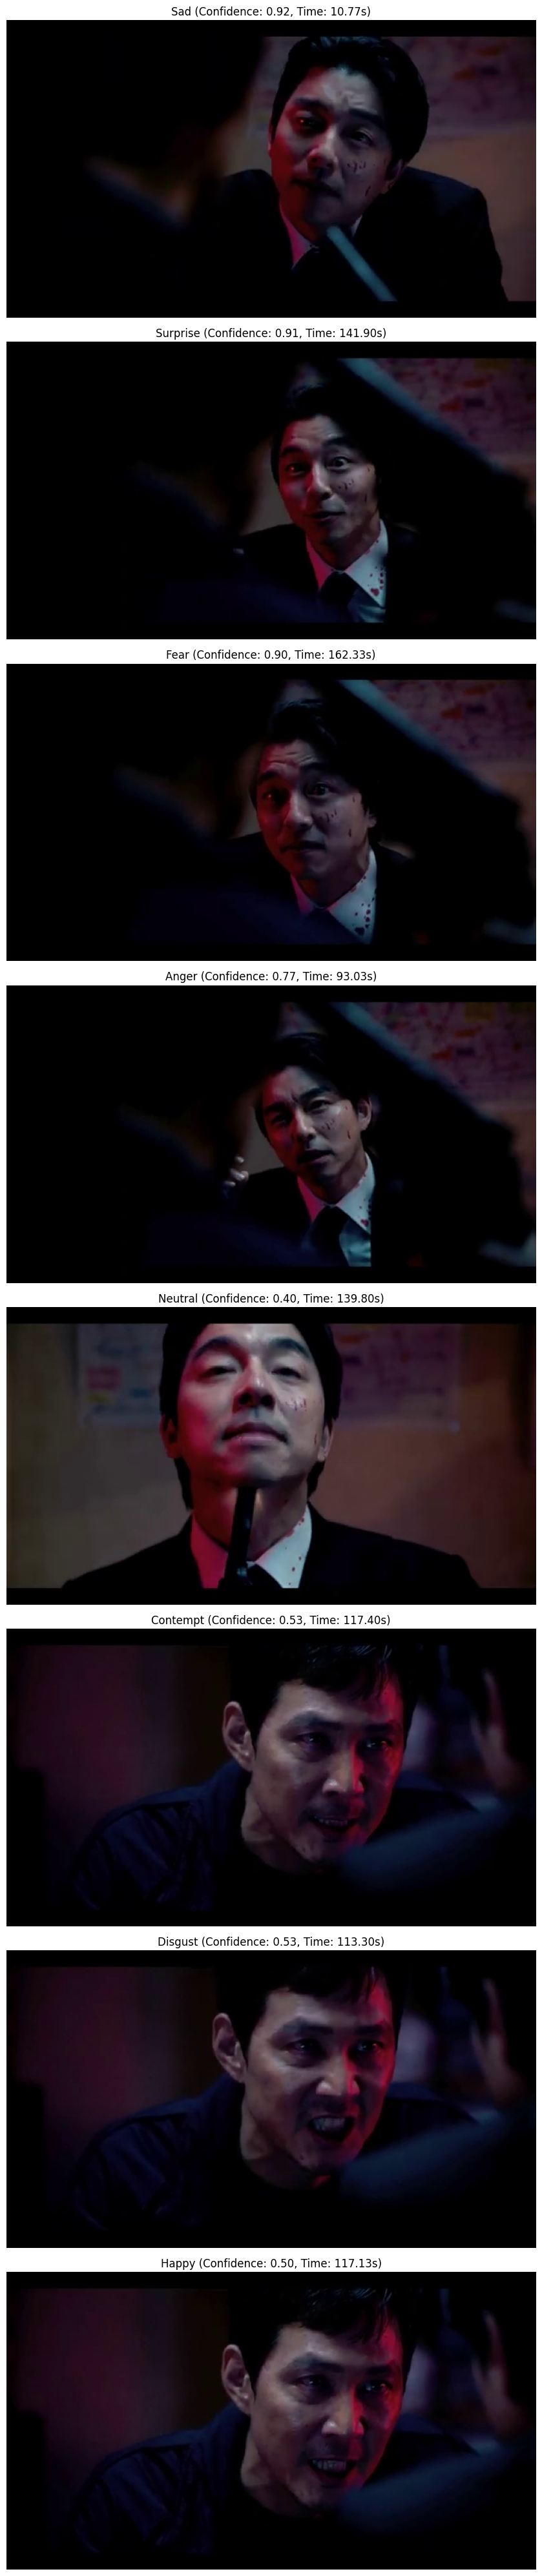

In [ ]:
# prompt: Í≤∞Í≥ºÌååÏùºÏùÑ Ïù¥Ïö©Ìï¥ÏÑú ÏãúÍ∞ÅÌôîÎèÑ ÏßÑÌñâÌï¥Î≥¥Ïûê. Í∞êÏ†ïÎ≥ÑÎ°ú Í∞ÄÏû• Ï†êÏàòÍ∞Ä ÎÜíÏïòÎçò ÌîÑÎ†àÏûÑÏùÑ ÌîÑÎ†àÏûÑÍ≥º ÌÅ¥ÎûòÏä§Î•º Í∞ôÏù¥ Î≥¥Ïó¨Ï§ò. ÌîÑÎ†àÏûÑÏùÄ fpsÎ•º Î∞îÌÉïÏúºÎ°ú Í≥ÑÏÇ∞Ìï¥ÏÑú ÏòÅÏÉÅÏùò Ïñ¥ÎäêÎ∂ÄÎ∂ÑÏù∏ÏßÄ ÏãúÍ∞ÑÏúºÎ°ú ÌëúÏãúÌï¥Ï§ò.

import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

# Í≤∞Í≥º CSV ÌååÏùº Í≤ΩÎ°ú
csv_file = "pipelined_emotion_results_from_frames.csv"

# ÌîÑÎ†àÏûÑ Ïù¥ÎØ∏ÏßÄ Ìè¥Îçî Í≤ΩÎ°ú
frames_folder = "/content/squid_game_example_frames/frames"

# ÏõêÎ≥∏ ÎπÑÎîîÏò§ Í≤ΩÎ°ú (FPS Ï†ïÎ≥¥Î•º ÏúÑÌï¥ ÌïÑÏöî)
video_path = "/content/0003_youtube_trailer_01.mp4"

# Í≤∞Í≥º DataFrame Î°úÎìú
df = pd.read_csv(csv_file)

# FPS Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
cap.release()

# Í∞êÏ†ïÎ≥ÑÎ°ú Í∞ÄÏû• ÎÜíÏùÄ Ï†êÏàòÎ•º Í∞ÄÏßÑ ÌîÑÎ†àÏûÑ Ï∞æÍ∏∞
top_emotions = {}
for emotion in df['emotion'].unique():
    top_frame = df[df['emotion'] == emotion].sort_values('confidence', ascending=False).iloc[0]
    top_emotions[emotion] = top_frame

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(len(top_emotions), 1, figsize=(10, 5 * len(top_emotions)))
if len(top_emotions) == 1: # axesÍ∞Ä 1Ï∞®Ïõê Î∞∞Ïó¥Ïùº Í≤ΩÏö∞ Ï≤òÎ¶¨
    axes = [axes]

for i, (emotion, frame_data) in enumerate(top_emotions.items()):
    frame_index = int(frame_data['frame_index'])
    frame_time = frame_index / fps
    frame_filename = frame_data['filename']
    confidence = frame_data['confidence']

    frame_path = os.path.join(frames_folder, frame_filename)
    img = cv2.imread(frame_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR to RGB for matplotlib

    axes[i].imshow(img)
    axes[i].set_title(f"{emotion} (Confidence: {confidence:.2f}, Time: {frame_time:.2f}s)")
    axes[i].axis('off')

plt.tight_layout()
plt.show()